# Analisis descriptivo

### Importacion de datos

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, classification_report, 
                             roc_curve, roc_auc_score)


## Carga de excel y datos.

In [107]:
excel_file = "datos_ecoli.xlsx" 
df = pd.read_excel(excel_file, sheet_name=0) 

print("\n=== Columnas originales ===")
print(df.columns.tolist())



=== Columnas originales ===
['PATIENT_ID,C,12', 'SEX,C,1', 'DATE_BIRTH,D', 'AGE,C,3', 'WARD,C,6', 'SPEC_DATE,D', 'SPEC_TYPE,C,2', 'ORGANISM,C,3', 'ESBL,C,1', 'CARBAPENEM,C,1', 'X_IAD,C,7', 'X_APB,C,7', 'X_EDTA,C,3', 'X_THM,C,3', 'X_ISO,C,6', 'X_CARBA_NP,C,10', 'X_XPERT,C,1', 'X_MCIM,C,1', 'X_ECIM,C,1', 'X_GEN_CARB,C,7', 'X_ICR,C,10', 'X_OXSF,C,10', 'X_VIGILANC,C,10', 'X_HODGE,C,10', 'NOSOCOMIAL,C,10', 'X_CARB_NP,C,10', 'AMK_NM,C,6', 'AMB_NM,C,6', 'AMP_NM,C,6', 'SAM_NM,C,6', 'ATM_NM,C,6', 'CAS_NM,C,6', 'CZO_NM,C,6', 'FEP_NM,C,6', 'CTX_NM,C,6', 'FOX_NM,C,6', 'CAZ_NM,C,6', 'CRO_NM,C,6', 'CXM_NM,C,6', 'CXA_NM,C,6', 'CEP_NM,C,6', 'CIP_NM,C,6', 'CLI_NM,C,6', 'COL_NM,C,6', 'DOR_NM,C,6', 'ETP_NM,C,6', 'ERY_NM,C,6', 'FLU_NM,C,6', 'FOS_NM,C,6', 'GEN_NM,C,6', 'GEH_NM,C,6', 'IPM_NM,C,6', 'LVX_NM,C,6', 'LNZ_NM,C,6', 'MEM_NM,C,6', 'MIF_NM,C,6', 'MNO_NM,C,6', 'MFX_NM,C,6', 'NIT_NM,C,6', 'NOR_NM,C,6', 'OXA_NM,C,6', 'TZP_NM,C,6', 'QDA_NM,C,6', 'RIF_NM,C,6', 'STH_NM,C,6', 'TEC_NM,C,6', 'TCY_NM,C,6', 'T

### Limpieza de las columnas de los datos.

In [108]:
new_col_names = []
#Limpieza de columnas de los datos.
for col in df.columns:
    clean_name = col.split(',', 1)[0]
    new_col_names.append(clean_name)

df.columns = new_col_names

print("\n=== Columnas luego de limpiarlas ===")
print(df.columns.tolist())



=== Columnas luego de limpiarlas ===
['PATIENT_ID', 'SEX', 'DATE_BIRTH', 'AGE', 'WARD', 'SPEC_DATE', 'SPEC_TYPE', 'ORGANISM', 'ESBL', 'CARBAPENEM', 'X_IAD', 'X_APB', 'X_EDTA', 'X_THM', 'X_ISO', 'X_CARBA_NP', 'X_XPERT', 'X_MCIM', 'X_ECIM', 'X_GEN_CARB', 'X_ICR', 'X_OXSF', 'X_VIGILANC', 'X_HODGE', 'NOSOCOMIAL', 'X_CARB_NP', 'AMK_NM', 'AMB_NM', 'AMP_NM', 'SAM_NM', 'ATM_NM', 'CAS_NM', 'CZO_NM', 'FEP_NM', 'CTX_NM', 'FOX_NM', 'CAZ_NM', 'CRO_NM', 'CXM_NM', 'CXA_NM', 'CEP_NM', 'CIP_NM', 'CLI_NM', 'COL_NM', 'DOR_NM', 'ETP_NM', 'ERY_NM', 'FLU_NM', 'FOS_NM', 'GEN_NM', 'GEH_NM', 'IPM_NM', 'LVX_NM', 'LNZ_NM', 'MEM_NM', 'MIF_NM', 'MNO_NM', 'MFX_NM', 'NIT_NM', 'NOR_NM', 'OXA_NM', 'TZP_NM', 'QDA_NM', 'RIF_NM', 'STH_NM', 'TEC_NM', 'TCY_NM', 'TGC_NM', 'SXT_NM', 'VAN_NM', 'VOR_NM', 'FCT_NM', 'NAL_NM', 'AMC_NM', 'CFM_NM', 'PEN_NM', 'MIF_ND', 'MIF_NE', 'DAP_NM', 'CZA_NM', 'SXT_ND1_2', 'AZM_NM', 'CFP_NM', 'CHL_NM', 'STR_NM', 'OFX_NM', 'TLT_NM', 'ATM_NE', 'TZP_NE', 'TGC_NE', 'TOB_NM', 'AMX_NM', 'DOR_ND10', 

## Analisis descriptivo

In [109]:
import pandas as pd
import numpy as np

# Supongamos que el DataFrame ya está cargado en la variable df
# Si necesitas cargarlo desde un archivo, descomenta y ajusta la siguiente línea:
# df = pd.read_csv('ruta_al_archivo.csv')

# Convertir las columnas de fecha a formato datetime
df['DATE_BIRTH'] = pd.to_datetime(df['DATE_BIRTH'])
df['SPEC_DATE'] = pd.to_datetime(df['SPEC_DATE'])
df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')

# 1. Descripción General del DataFrame
print("=== Descripción General ===")
print(f"Tamaño del DataFrame: {df.shape}")
print("\nTipos de datos:")
print(df.dtypes)
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# 2. Análisis Univariado

# Función para analizar variables categóricas
def analizar_categorica(columna):
    print(f"\n--- Análisis de '{columna}' ---")
    print("Frecuencia absoluta:")
    print(df[columna].value_counts())
    print("\nFrecuencia relativa (%):")
    print(df[columna].value_counts(normalize=True) * 100)
    print(f"Moda: {df[columna].mode()[0]}")

# Variables categóricas
categoricas = ['SEX', 'WARD', 'SPEC_TYPE', 'ORGANISM', 'ESBL']
for col in categoricas:
    analizar_categorica(col)

# Análisis de la variable numérica 'AGE'
print("\n--- Análisis de 'AGE' ---")
print(f"Media: {df['AGE'].mean():.2f}")
print(f"Mediana: {df['AGE'].median():.2f}")
print(f"Desviación estándar: {df['AGE'].std():.2f}")
print(f"Mínimo: {df['AGE'].min()}")
print(f"Máximo: {df['AGE'].max()}")
print("Cuartiles:")
print(df['AGE'].quantile([0.25, 0.5, 0.75]))

# Función para analizar variables de fecha
def analizar_fecha(columna):
    print(f"\n--- Análisis de '{columna}' ---")
    print(f"Rango de fechas: {df[columna].min()} a {df[columna].max()}")
    print("\nFrecuencia por año:")
    print(df[columna].dt.year.value_counts().sort_index())

# Analizar columnas de fecha
analizar_fecha('DATE_BIRTH')
analizar_fecha('SPEC_DATE')

# Verificar unicidad de 'PATIENT_ID'
print("\n--- Análisis de 'PATIENT_ID' ---")
duplicados = df['PATIENT_ID'].duplicated().sum()
print(f"Número de IDs duplicados: {duplicados}")
if duplicados == 0:
    print("Todos los IDs son únicos.")
else:
    print("Hay IDs duplicados. Revisa los datos.")

# 3. Análisis Bivariado (Opcional)

# Media de edad por género
print("\n--- Media de edad por género ---")
print(df.groupby('SEX')['AGE'].mean())

# Tabla de contingencia entre 'ORGANISM' y 'WARD'
print("\n--- Tabla de contingencia ORGANISM vs WARD ---")
print(pd.crosstab(df['WARD'], df['ORGANISM']))

# Porcentaje de ESBL positivo por organismo
print("\n--- Porcentaje de ESBL positivo por ORGANISM ---")
esbl_por_organismo = pd.crosstab(df['ORGANISM'], df['ESBL'], normalize='index') * 100
print(esbl_por_organismo)

# Fin del análisis
print("\n=== Fin del análisis descriptivo ===")

=== Descripción General ===
Tamaño del DataFrame: (7675, 142)

Tipos de datos:
PATIENT_ID            object
SEX                   object
DATE_BIRTH    datetime64[ns]
AGE                  float64
WARD                  object
                   ...      
STH_ND300            float64
TCY_ND30             float64
TEC_ND30             float64
TGC_ND15             float64
X_1_NM               float64
Length: 142, dtype: object

Valores faltantes por columna:
PATIENT_ID       0
SEX              0
DATE_BIRTH       0
AGE            424
WARD             0
              ... 
STH_ND300     7675
TCY_ND30      7675
TEC_ND30      7675
TGC_ND15      7675
X_1_NM        7675
Length: 142, dtype: int64

--- Análisis de 'SEX' ---
Frecuencia absoluta:
SEX
f    5763
m    1912
Name: count, dtype: int64

Frecuencia relativa (%):
SEX
f    75.087948
m    24.912052
Name: proportion, dtype: float64
Moda: f

--- Análisis de 'WARD' ---
Frecuencia absoluta:
WARD
urgmix    5018
c.ext     1323
5piso      198
1/2adu    

## Graficas.

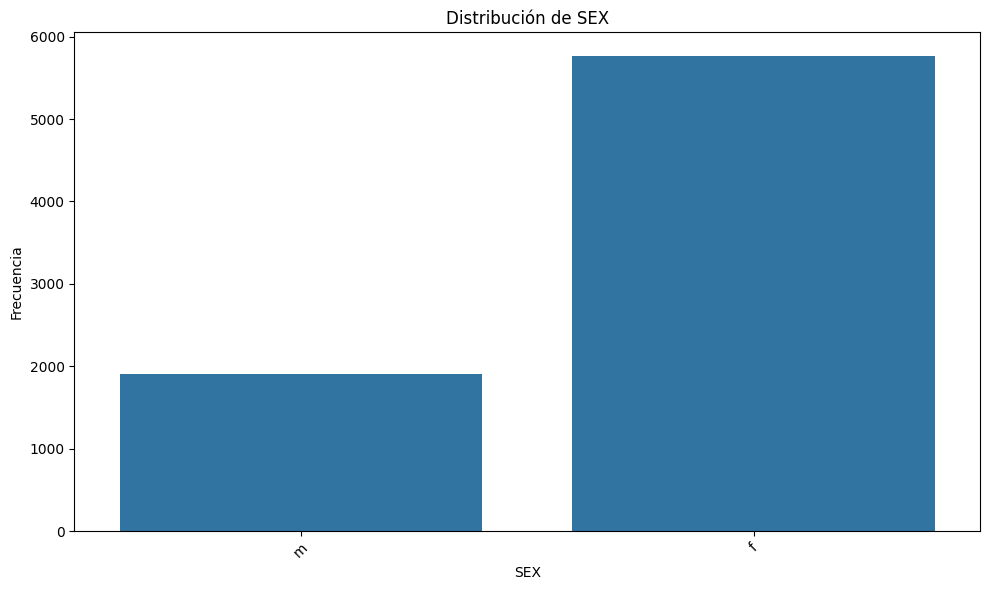

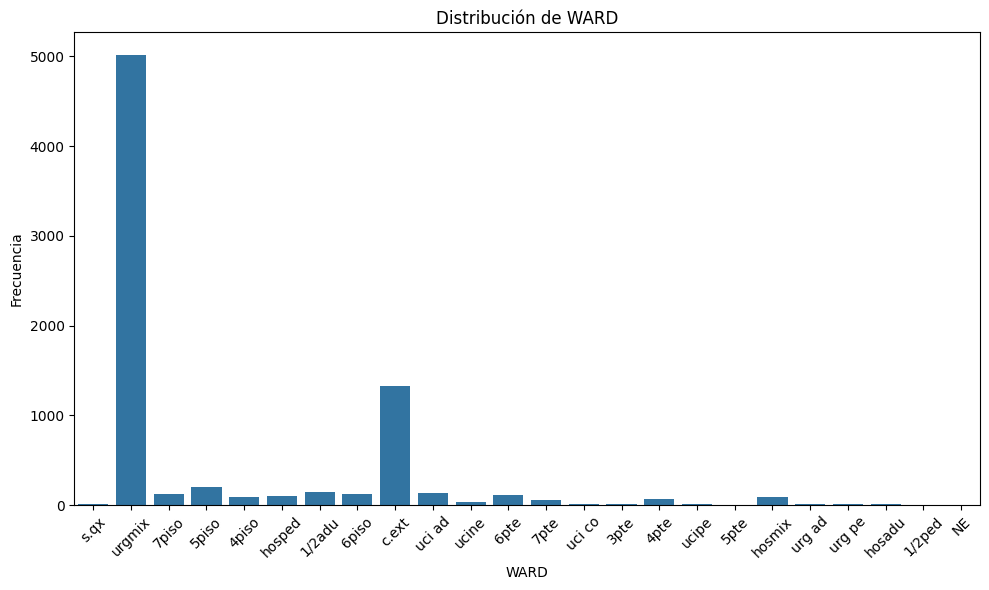

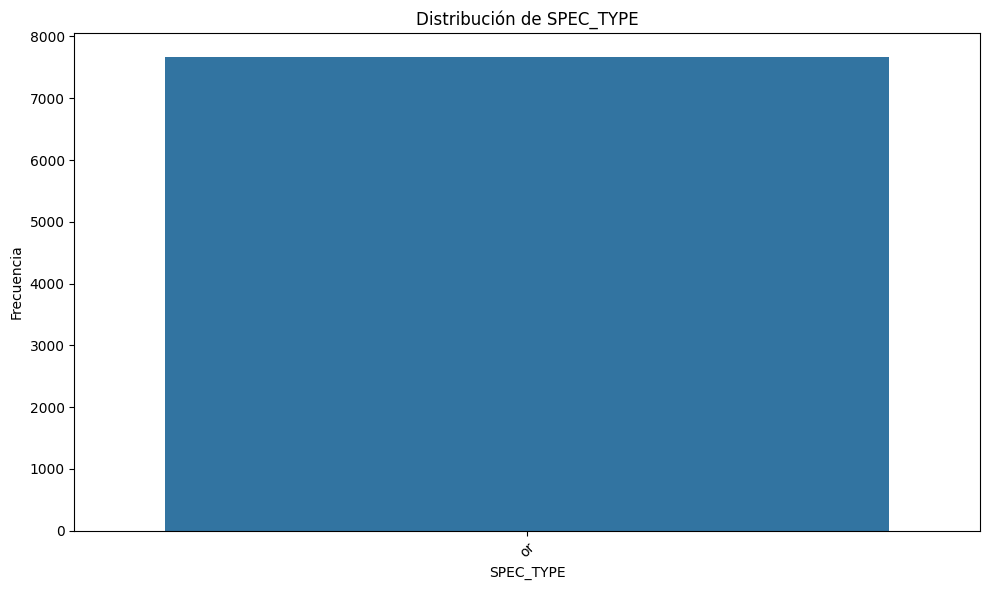

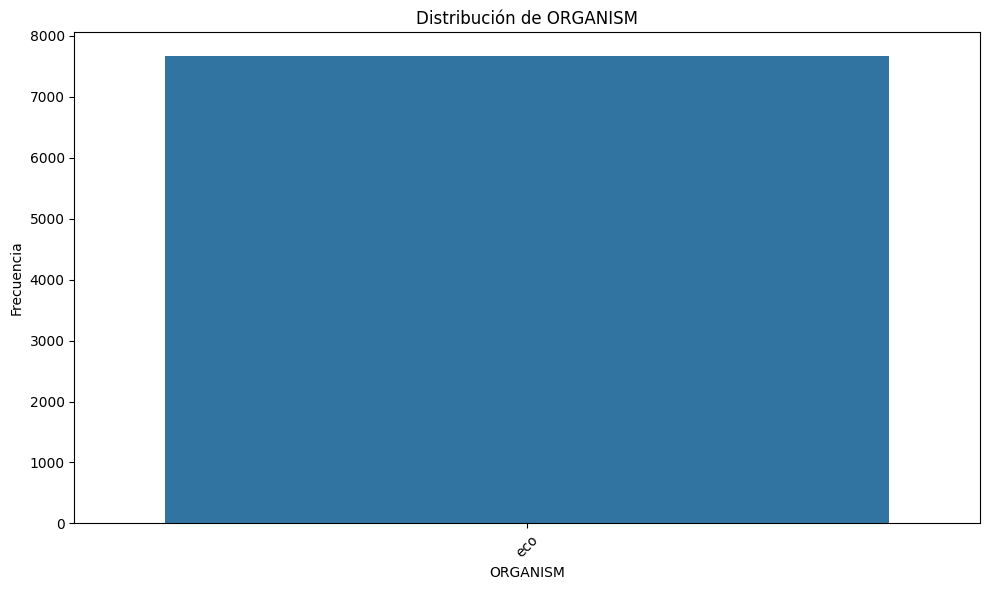

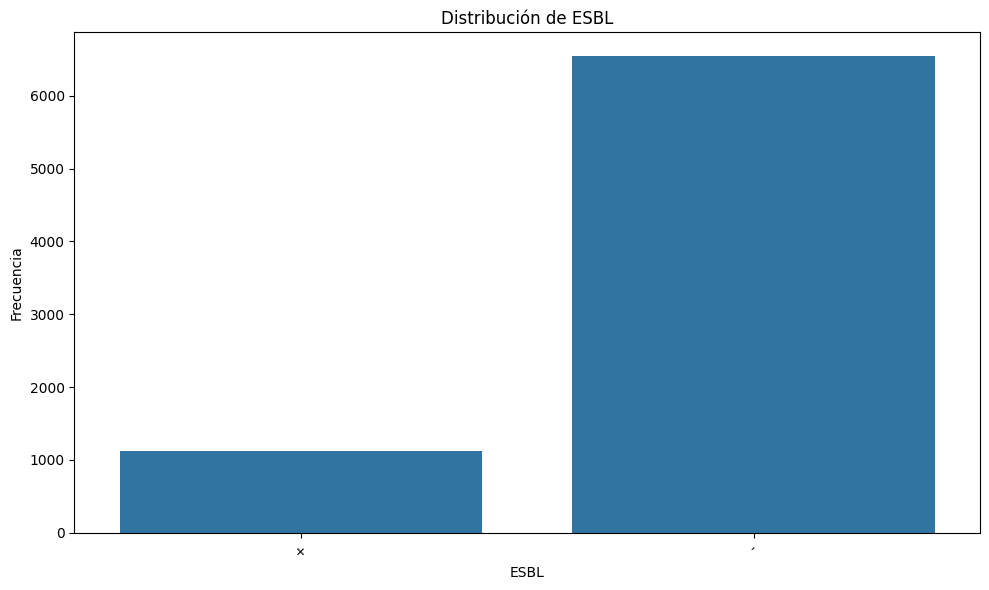

In [110]:
# Lista de variables categóricas
categoricas = ['SEX', 'WARD', 'SPEC_TYPE', 'ORGANISM', 'ESBL']

# Función para graficar variables categóricas
def graficar_categorica(columna):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=columna)
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Graficar cada variable categórica
for col in categoricas:
    graficar_categorica(col)

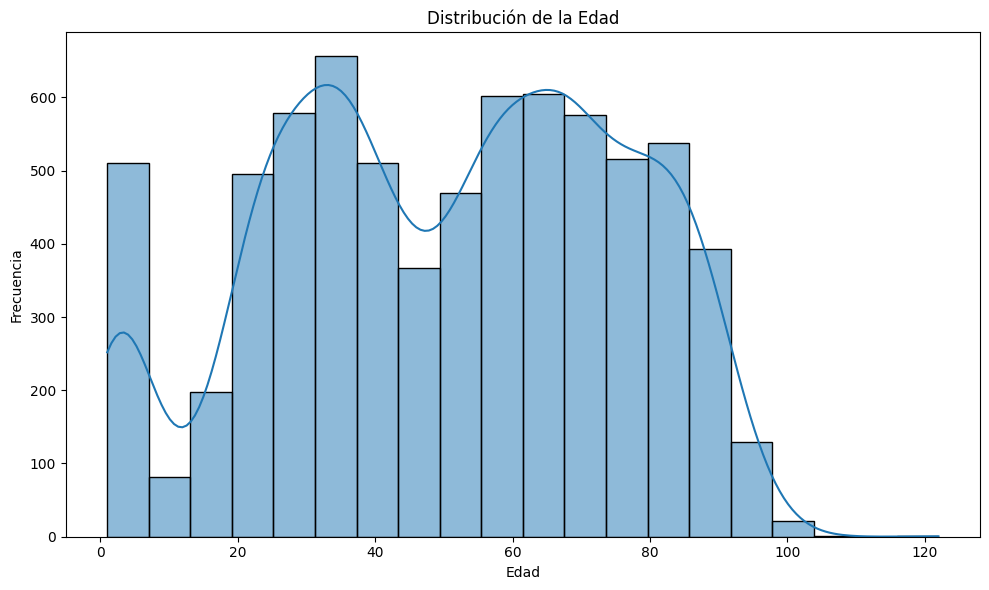

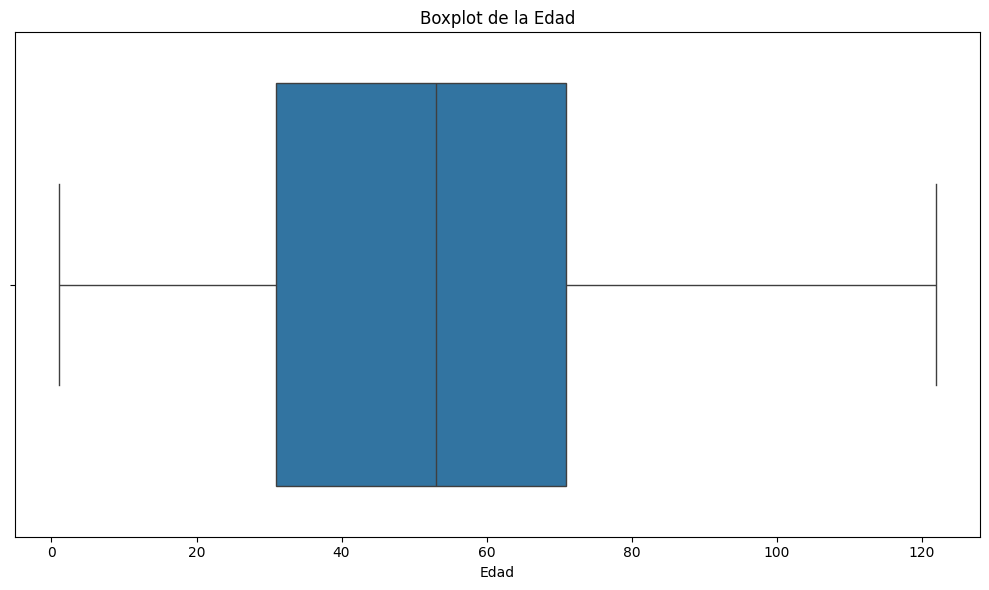

In [111]:
# Histograma de 'AGE'
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=20, kde=True)  # kde=True agrega la curva de densidad
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Boxplot de 'AGE'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['AGE'])
plt.title('Boxplot de la Edad')
plt.xlabel('Edad')
plt.tight_layout()
plt.show()

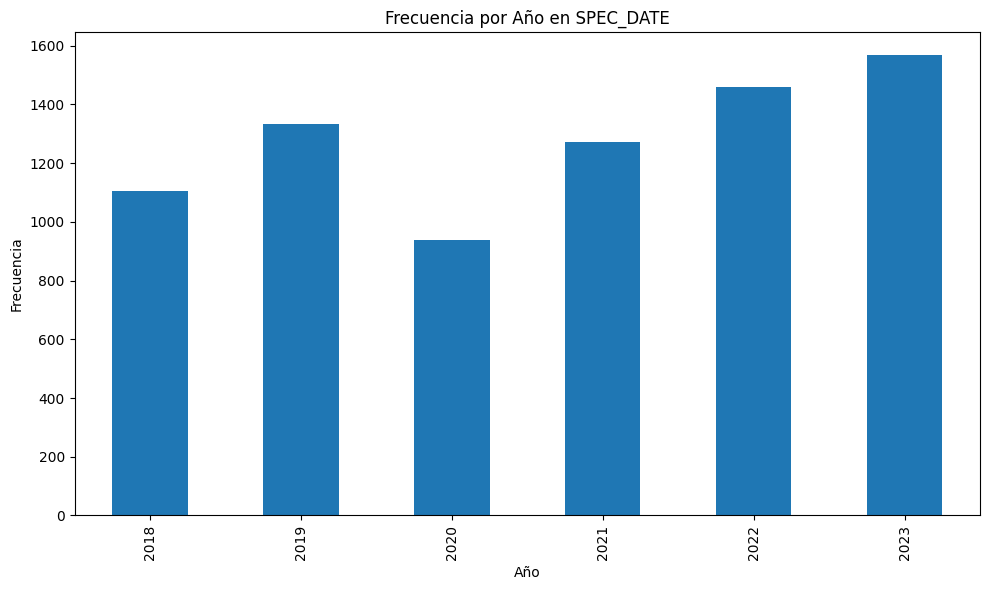

In [112]:
# Función para graficar frecuencia por año
def graficar_fecha(columna):
    plt.figure(figsize=(10, 6))
    df[columna].dt.year.value_counts().sort_index().plot(kind='bar')
    plt.title(f'Frecuencia por Año en {columna}')
    plt.xlabel('Año')
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

# Graficar para 'DATE_BIRTH' y 'SPEC_DATE'
graficar_fecha('SPEC_DATE')

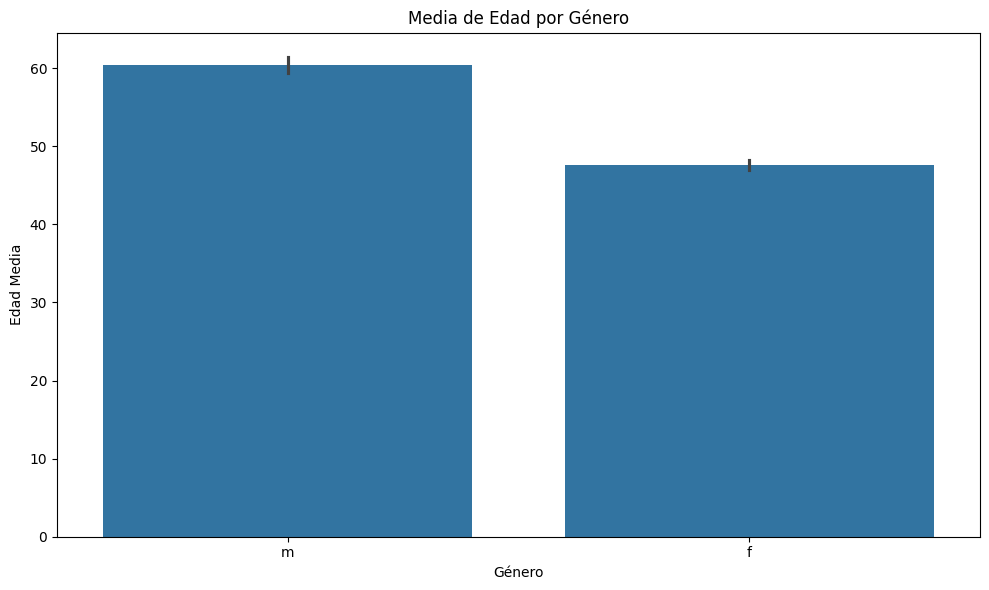

In [113]:
# Gráfico de barras para media de edad por género
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='SEX', y='AGE', estimator=np.mean)
plt.title('Media de Edad por Género')
plt.xlabel('Género')
plt.ylabel('Edad Media')
plt.tight_layout()
plt.show()

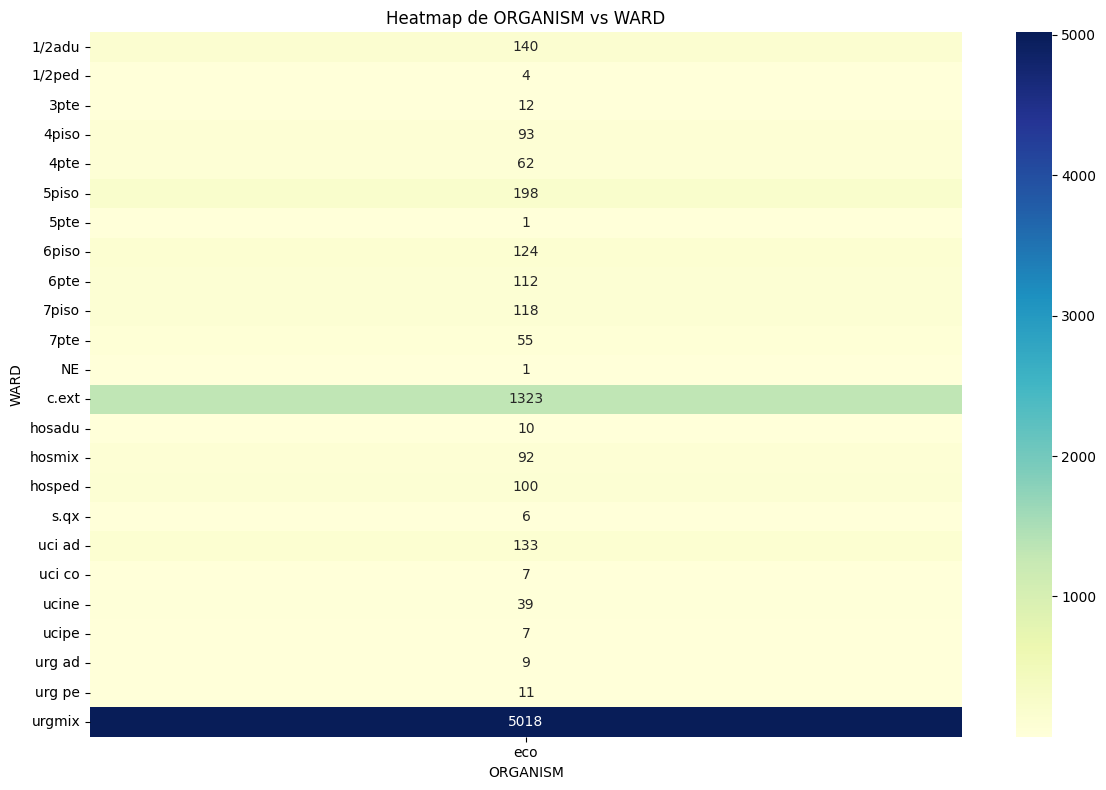

In [114]:
# Tabla de contingencia
contingencia = pd.crosstab(df['WARD'], df['ORGANISM'])

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingencia, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap de ORGANISM vs WARD')
plt.xlabel('ORGANISM')
plt.ylabel('WARD')
plt.tight_layout()
plt.show()

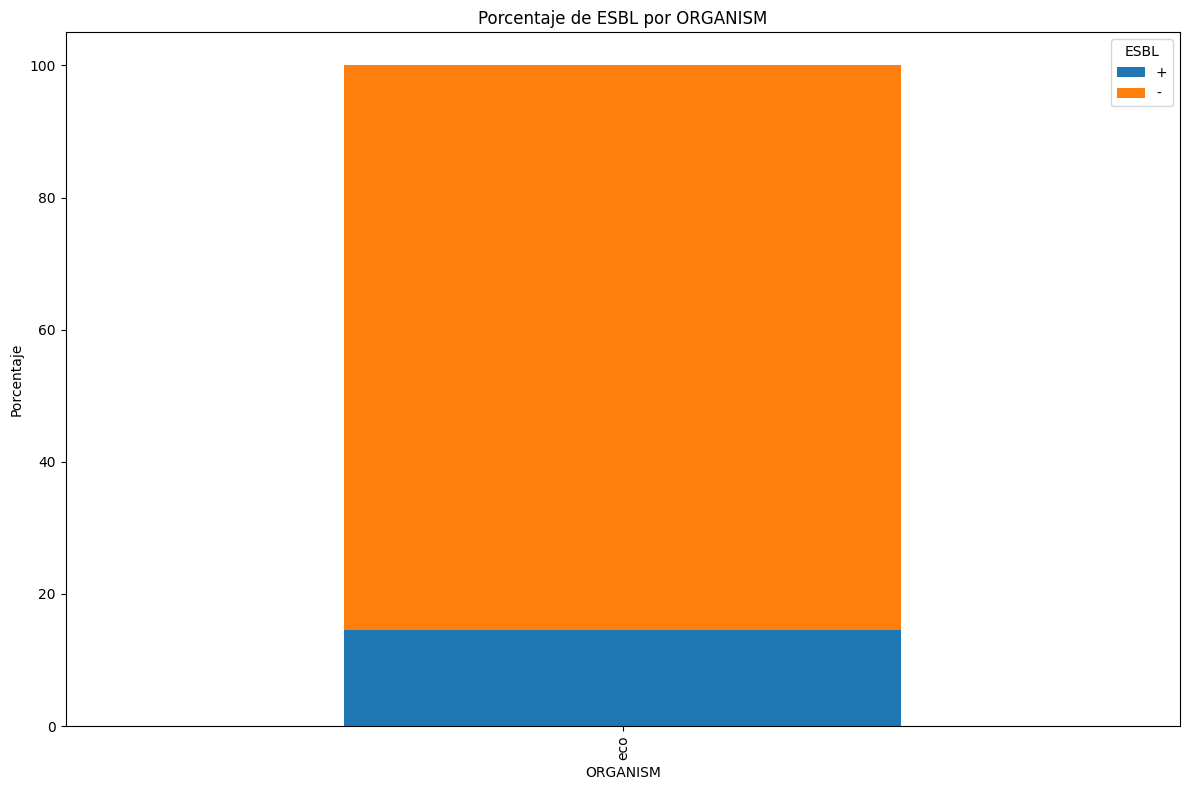

In [115]:
# Tabla de porcentajes
esbl_por_organismo = pd.crosstab(df['ORGANISM'], df['ESBL'], normalize='index') * 100

# Gráfico de barras apiladas
esbl_por_organismo.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Porcentaje de ESBL por ORGANISM')
plt.xlabel('ORGANISM')
plt.ylabel('Porcentaje')
plt.legend(title='ESBL')
plt.tight_layout()
plt.show()

### Parseo de valores. Teniendo en cuenta que se manejan intervalos.

In [116]:
def parse_mic_no_round(value):
    """
    Convierte valores con símbolos <= o > en un número flotante, evitando redondeos
    o multiplicaciones. Para valores '>x', se suma un pequeño delta (0.0001).
    Ejemplo: '<=2' -> 2.0, '>16' -> 16.0001
    Ajusta la lógica (y el delta) según tus criterios de laboratorio.
    """
    if pd.isnull(value) or str(value).strip() == '':
        return np.nan
    
    val_str = str(value).strip().lower()

    # Caso: "<=x"
    if val_str.startswith('<='):
        try:
            # Eliminar la parte "<=" y convertir a float
            return float(val_str.replace('<=', ''))
        except:
            return np.nan

    # Caso: ">x"
    elif val_str.startswith('>'):
        try:
            # Eliminar la parte ">" y convertir a float, luego sumarle un delta
            base_val = float(val_str.replace('>', ''))
            return base_val + 0.0001
        except:
            return np.nan

    # Caso: Valor numérico directo
    else:
        try:
            return float(val_str)
        except:
            return np.nan


### Tomar enzimas de interes

In [117]:
# Seleccionar columnas de interés
cols_enzimas = [
        'CARBAPENEM', 'X_IAD', 'X_APB', 'X_EDTA', 'X_THM', 'X_ISO',
        'X_CARBA_NP', 'X_XPERT', 'X_MCIM', 'X_ECIM', 'X_GEN_CARB', 'X_ICR',
        'X_OXSF', 'X_VIGILANC', 'X_HODGE', 'NOSOCOMIAL', 'X_CARB_NP',
        'AMK_NM', 'AMB_NM', 'AMP_NM', 'SAM_NM', 'ATM_NM', 'CAS_NM',
        'CZO_NM', 'FEP_NM', 'CTX_NM', 'FOX_NM', 'CAZ_NM', 'CRO_NM',
        'CXM_NM', 'CXA_NM', 'CEP_NM', 'CIP_NM', 'CLI_NM', 'COL_NM',
        'DOR_NM', 'ETP_NM', 'ERY_NM', 'FLU_NM', 'FOS_NM', 'GEN_NM',
        'GEH_NM', 'IPM_NM', 'LVX_NM', 'LNZ_NM', 'MEM_NM', 'MIF_NM',
        'MNO_NM', 'MFX_NM', 'NIT_NM', 'NOR_NM', 'OXA_NM', 'TZP_NM',
        'QDA_NM', 'RIF_NM', 'STH_NM', 'TEC_NM', 'TCY_NM', 'TGC_NM',
        'SXT_NM', 'VAN_NM', 'VOR_NM', 'FCT_NM', 'NAL_NM', 'AMC_NM',
        'CFM_NM', 'PEN_NM', 'MIF_ND', 'MIF_NE', 'DAP_NM', 'CZA_NM',
        'SXT_ND1_2', 'AZM_NM', 'CFP_NM', 'CHL_NM', 'STR_NM', 'OFX_NM',
        'TLT_NM', 'ATM_NE', 'TZP_NE', 'TGC_NE', 'TOB_NM', 'AMX_NM',
        'DOR_ND10', 'ATM_ND30', 'ETP_ND10', 'AMK_ND30', 'CIP_ND5',
        'SAM_ND10', 'IPM_ND10', 'MEM_ND10', 'CAZ_ND30', 'CTX_ND30',
        'FEP_ND30', 'TZP_ND100', 'CRO_ND30', 'NAL_ND30', 'AMP_ND10',
        'CZO_ND30', 'GEN_ND10', 'CLI_ND2', 'NIT_ND300', 'NOR_ND10',
        'OXA_ND1', 'VAN_ND30', 'ITR_NM', 'DOR_NE', 'DAP_NE', 'IPM_NE',
        'MEM_NE', 'VAN_NE', 'AMC_ND20', 'AMX_ND25', 'FOX_ND30',
        'CEP_ND30', 'CXM_ND30', 'CHL_ND30', 'COL_ND10', 'DAP_ND30',
        'ERY_ND15', 'FUS_ND50', 'GEH_ND120', 'LNZ_ND30', 'LVX_ND5',
        'MFX_ND5', 'MUP_ND5', 'PEN_ND10', 'RIF_ND5', 'STH_ND300',
        'TCY_ND30', 'TEC_ND30', 'TGC_ND15', 'X_1_NM'
    ]

# Ver cuáles de esas columnas existen en el DataFrame
cols_presentes = [c for c in cols_enzimas if c in df.columns]
print(f"\nColumnas de interés presentes en el DataFrame: {cols_presentes}")

# (Opcional) Parsear dichas columnas si tienen el formato <=, >
for c in cols_presentes:
    df[c] = df[c].apply(parse_mic_no_round)



Columnas de interés presentes en el DataFrame: ['CARBAPENEM', 'X_IAD', 'X_APB', 'X_EDTA', 'X_THM', 'X_ISO', 'X_CARBA_NP', 'X_XPERT', 'X_MCIM', 'X_ECIM', 'X_GEN_CARB', 'X_ICR', 'X_OXSF', 'X_VIGILANC', 'X_HODGE', 'NOSOCOMIAL', 'X_CARB_NP', 'AMK_NM', 'AMB_NM', 'AMP_NM', 'SAM_NM', 'ATM_NM', 'CAS_NM', 'CZO_NM', 'FEP_NM', 'CTX_NM', 'FOX_NM', 'CAZ_NM', 'CRO_NM', 'CXM_NM', 'CXA_NM', 'CEP_NM', 'CIP_NM', 'CLI_NM', 'COL_NM', 'DOR_NM', 'ETP_NM', 'ERY_NM', 'FLU_NM', 'FOS_NM', 'GEN_NM', 'GEH_NM', 'IPM_NM', 'LVX_NM', 'LNZ_NM', 'MEM_NM', 'MIF_NM', 'MNO_NM', 'MFX_NM', 'NIT_NM', 'NOR_NM', 'OXA_NM', 'TZP_NM', 'QDA_NM', 'RIF_NM', 'STH_NM', 'TEC_NM', 'TCY_NM', 'TGC_NM', 'SXT_NM', 'VAN_NM', 'VOR_NM', 'FCT_NM', 'NAL_NM', 'AMC_NM', 'CFM_NM', 'PEN_NM', 'MIF_ND', 'MIF_NE', 'DAP_NM', 'CZA_NM', 'SXT_ND1_2', 'AZM_NM', 'CFP_NM', 'CHL_NM', 'STR_NM', 'OFX_NM', 'TLT_NM', 'ATM_NE', 'TZP_NE', 'TGC_NE', 'TOB_NM', 'AMX_NM', 'DOR_ND10', 'ATM_ND30', 'ETP_ND10', 'AMK_ND30', 'CIP_ND5', 'SAM_ND10', 'IPM_ND10', 'MEM_ND10', 'CA

### Preparacion variable objetivo

### Imputar valores vacios

In [118]:
df

,PATIENT_ID,SEX,DATE_BIRTH,AGE,WARD,SPEC_DATE,SPEC_TYPE,ORGANISM,ESBL,CARBAPENEM,...,LVX_ND5,MFX_ND5,MUP_ND5,PEN_ND10,RIF_ND5,STH_ND300,TCY_ND30,TEC_ND30,TGC_ND15,X_1_NM
0,175194,m,1955-03-08,63.0,s.qx,2018-04-23,or,eco,+,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201832,f,1965-01-01,53.0,urgmix,2018-04-13,or,eco,-,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,221703,f,1950-01-26,68.0,7piso,2018-04-26,or,eco,-,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,314692,f,1942-07-28,75.0,urgmix,2018-04-10,or,eco,-,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,334973,m,1939-05-12,78.0,urgmix,2018-04-01,or,eco,-,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7670,1001368171,f,2003-01-25,19.0,urgmix,2022-09-04,or,eco,-,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7671,9136888,m,1962-04-18,60.0,urgmix,2022-09-08,or,eco,-,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7672,3339775,m,1940-02-15,82.0,urgmix,2022-09-07,or,eco,-,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7673,32241336,f,1983-01-14,39.0,urgmix,2022-09-11,or,eco,-,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
import pandas as pd

def porcentaje_vacios_por_columna(df):

 porcentaje_vacios = (df.isnull().sum() / len(df)) * 100
 return porcentaje_vacios

porcentajes = porcentaje_vacios_por_columna(df)

# Filtrar las columnas que tienen un porcentaje de vacíos menor al 40%
columnas_a_mantener = porcentajes[porcentajes < 40].index

df_filtrado = df[columnas_a_mantener]

print("Porcentajes de vacíos por columna (DataFrame original):\n", porcentajes)
print("\nColumnas con menos del 40% de vacíos:\n", columnas_a_mantener)
print("\nPrimeras filas del DataFrame filtrado (solo columnas con < 40% vacíos):\n", df_filtrado.head())

df_imputado_moda = df_filtrado.copy()

for columna in df_imputado_moda.columns:
    moda_columna = df_imputado_moda[columna].mode()
    if not moda_columna.empty:
        valor_moda = moda_columna[0] 
        df_imputado_moda[columna].fillna(valor_moda, inplace=True)
    else:
        print(f"Advertencia: No se pudo imputar la columna '{columna}' porque no tiene moda (todos los valores son NaN o la moda no está definida claramente). Se mantienen los NaN en esta columna.")


print("\nPrimeras filas del DataFrame imputado con la moda:\n", df_imputado_moda.head())

nombre_archivo_excel_imputado = 'df_imputado_moda.xlsx'
df_imputado_moda.to_excel(nombre_archivo_excel_imputado, index=True, sheet_name='DataFrame Imputado Moda')
print(f"\nEl DataFrame imputado con la moda ha sido guardado en el archivo Excel: '{nombre_archivo_excel_imputado}'")

Porcentajes de vacíos por columna (DataFrame original):
 PATIENT_ID      0.00000
SEX             0.00000
DATE_BIRTH      0.00000
AGE             5.52443
WARD            0.00000
                ...    
STH_ND300     100.00000
TCY_ND30      100.00000
TEC_ND30      100.00000
TGC_ND15      100.00000
X_1_NM        100.00000
Length: 142, dtype: float64

Columnas con menos del 40% de vacíos:
 Index(['PATIENT_ID', 'SEX', 'DATE_BIRTH', 'AGE', 'WARD', 'SPEC_DATE',
       'SPEC_TYPE', 'ORGANISM', 'ESBL', 'AMK_NM', 'SAM_NM', 'ATM_NM', 'FEP_NM',
       'CAZ_NM', 'CRO_NM', 'CIP_NM', 'ETP_NM', 'GEN_NM', 'MEM_NM', 'NIT_NM',
       'TZP_NM', 'TGC_NM', 'SXT_NM'],
      dtype='object')

Primeras filas del DataFrame filtrado (solo columnas con < 40% vacíos):
   PATIENT_ID SEX DATE_BIRTH   AGE    WARD  SPEC_DATE SPEC_TYPE ORGANISM ESBL  \
0     175194   m 1955-03-08  63.0    s.qx 2018-04-23        or      eco    +   
1     201832   f 1965-01-01  53.0  urgmix 2018-04-13        or      eco    -   
2     2217

C:\Users\JUAN BERNAL\AppData\Local\Temp\ipykernel_3060\1376377631.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputado_moda[columna].fillna(valor_moda, inplace=True)
C:\Users\JUAN BERNAL\AppData\Local\Temp\ipykernel_3060\1376377631.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav


El DataFrame imputado con la moda ha sido guardado en el archivo Excel: 'df_imputado_moda.xlsx'


## PCA

Columnas eliminadas antes del PCA: ['PATIENT_ID', 'SEX', 'DATE_BIRTH', 'AGE', 'WARD', 'SPEC_DATE', 'SPEC_TYPE', 'ORGANISM']

Varianza Explicada por Componente Principal:
 [0.23248055 0.11409283 0.08949827 0.08128718 0.07733339 0.06380072
 0.05984966 0.05453224 0.05202434 0.04870763 0.04019993 0.03614031
 0.02768977 0.02236318]

Varianza Acumulada por Componente Principal:
 [0.23248055 0.34657339 0.43607166 0.51735883 0.59469222 0.65849295
 0.71834261 0.77287485 0.82489919 0.87360682 0.91380675 0.94994706
 0.97763682 1.        ]


C:\Users\JUAN BERNAL\AppData\Local\Temp\ipykernel_3060\3197304784.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[columna].fillna(valor_moda, inplace=True)
C:\Users\JUAN BERNAL\AppData\Local\Temp\ipykernel_3060\3197304784.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[columna].fillna(valor_moda, inplace=True)


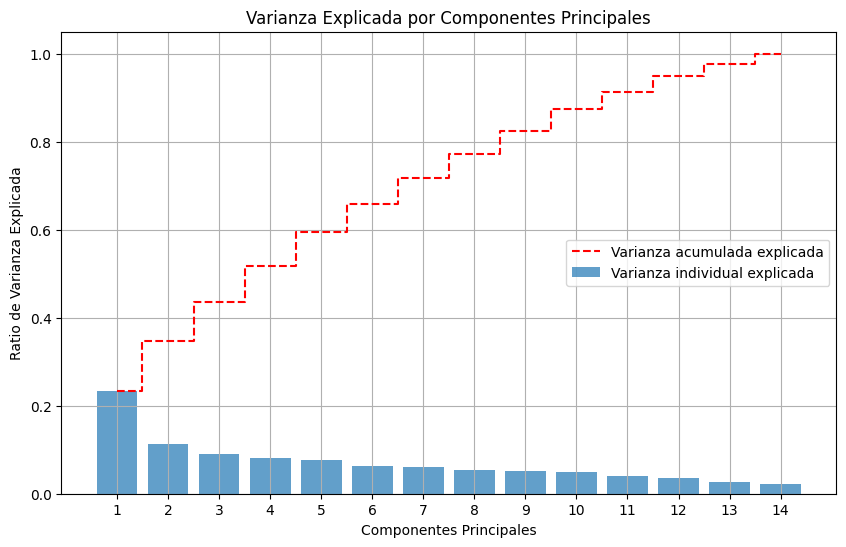


Primeras filas de los datos transformados por PCA (DataFrame: df_pca):
          0         1         2         3         4         5         6   \
0  2.509410 -0.336712 -0.351458 -1.195907 -0.170917 -0.045039 -0.389931   
1 -0.577042  0.550620  0.197837  0.195451 -0.242935 -0.238772 -0.279214   
2 -0.577045  0.550616  0.197841  0.195445 -0.242934 -0.238771 -0.279212   
3 -0.947788  0.027619  0.954299 -0.510983  0.023791 -0.082667 -0.094014   
4 -0.187627 -0.075127  1.167522  0.494471 -0.164365  1.065768  2.293706   

         7         8         9         10        11        12        13  
0  1.126766  0.480090  0.522982  0.101762  2.779682  1.420748  0.127249  
1 -0.291223  0.524502 -0.628624 -0.931172  0.500561  0.476065 -0.112417  
2 -0.291225  0.524495 -0.628617 -0.931168  0.500556  0.476065 -0.112417  
3 -0.448705 -0.543948  0.415290 -0.366270 -0.134150  0.389401 -0.101809  
4 -0.945053 -1.306938 -0.339626 -0.175747  0.072375  0.412761 -0.169173  

Número óptimo de componentes pr

In [121]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def realizar_pca_para_prediccion(df, variable_objetivo_nombre, columnas_a_eliminar):
    """
    Implementa un PCA para reducir la dimensionalidad de las variables predictoras
    y muestra los resultados para predecir una variable objetivo específica.
    Elimina columnas especificadas antes de realizar el PCA.

    Parámetros:
    df (DataFrame): DataFrame de pandas que contiene los datos.
    variable_objetivo_nombre (str): Nombre de la columna que se usará como variable objetivo.
    columnas_a_eliminar (list): Lista de nombres de columnas para eliminar del DataFrame antes del PCA.

    Retorna:
    None: Imprime los resultados del PCA y genera visualizaciones.
    """

    # 0. Eliminar las columnas especificadas
    columnas_originales = df.columns.tolist() # Guarda las columnas originales para mensaje informativo
    df = df.drop(columns=columnas_a_eliminar, errors='ignore') # Usar errors='ignore' para evitar errores si alguna columna no existe
    columnas_eliminadas_realmente = [col for col in columnas_a_eliminar if col in columnas_originales] # Lista de columnas realmente eliminadas

    print(f"Columnas eliminadas antes del PCA: {columnas_eliminadas_realmente}")

    variables_enzimas = [col for col in df.columns if col not in [variable_objetivo_nombre, 'ESBL']] # Excluimos 'ESBL' también, si es relevante

    X = df[variables_enzimas]
    y = df[variable_objetivo_nombre]

    # 2. Manejar valores faltantes (Imputación con la moda) - Opcional, pero recomendado
    for columna in X.columns:
        moda_columna = X[columna].mode()
        if not moda_columna.empty:
            valor_moda = moda_columna[0]
            X[columna].fillna(valor_moda, inplace=True)
        else:
            print(f"Advertencia: No se pudo imputar la columna '{columna}' porque no tiene moda. Se rellenan los NaN con 0.")
            X[columna].fillna(0, inplace=True) # Rellenar con 0 si no hay moda

    # 3. Estandarizar las variables predictoras
    scaler = StandardScaler()
    X_escalado = scaler.fit_transform(X)

    # 4. Aplicar PCA
    pca = PCA() # Puedes especificar n_components si lo conoces o quieres probar
    pca.fit(X_escalado)

    # 5. Determinar la varianza explicada por cada componente principal
    varianza_explicada = pca.explained_variance_ratio_
    varianza_acumulada = np.cumsum(varianza_explicada)

    print("\nVarianza Explicada por Componente Principal:\n", varianza_explicada)
    print("\nVarianza Acumulada por Componente Principal:\n", varianza_acumulada)

    # 6. Visualización de la varianza explicada
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada, alpha=0.7, align='center',
            label='Varianza individual explicada')
    plt.step(range(1, len(varianza_acumulada) + 1), varianza_acumulada, where='mid', linestyle='--', color='red',
             label='Varianza acumulada explicada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.xticks(range(1, len(varianza_explicada) + 1))
    plt.legend(loc='center right')
    plt.title('Varianza Explicada por Componentes Principales')
    plt.grid(True)
    plt.show()
    # [Image of Bar and Step plot showing explained variance and cumulative explained variance for PCA components]

    # 7. Transformar los datos al espacio de los componentes principales
    X_pca = pca.transform(X_escalado)
    df_pca = pd.DataFrame(data=X_pca, index=df.index) # Puedes poner nombres de columnas si lo deseas
    print("\nPrimeras filas de los datos transformados por PCA (DataFrame: df_pca):\n", df_pca.head())

    # 8. (Opcional) Seleccionar un número de componentes principales basado en la varianza acumulada
    n_componentes_optimo = np.argmax(varianza_acumulada >= 0.95) + 1 # Ejemplo: 95% de varianza
    print(f"\nNúmero óptimo de componentes principales para explicar al menos el 95% de la varianza: {n_componentes_optimo}")

    pca_optimo = PCA(n_components=n_componentes_optimo)
    pca_optimo.fit(X_escalado)
    X_pca_optimo = pca_optimo.transform(X_escalado)
    df_pca_optimo = pd.DataFrame(data=X_pca_optimo, index=df.index)
    print(f"\nPrimeras filas de los datos transformados por PCA (con {n_componentes_optimo} componentes - DataFrame: df_pca_optimo):\n", df_pca_optimo.head())

    print("\n--- Resumen del PCA ---")
    print(f"Variables predictoras (enzimas) usadas para PCA: {variables_enzimas}")
    print(f"Variable objetivo para predicción: {variable_objetivo_nombre}")
    print(f"Columnas eliminadas antes del PCA: {columnas_eliminadas_realmente}") # Mensaje con las columnas REALMENTE eliminadas
    print("\nResultados detallados (varianza explicada, datos transformados, etc.) han sido impresos y visualizados.")
    print("El DataFrame 'df_pca' contiene los datos transformados por PCA con todos los componentes.")
    print(f"El DataFrame 'df_pca_optimo' (opcional) contiene los datos transformados con {n_componentes_optimo} componentes principales (si se calculó un número óptimo).")



variable_objetivo = 'ESBL' 

# Define las columnas a eliminar
columnas_a_eliminar_pca = ['PATIENT_ID', 'SEX', 'DATE_BIRTH', 'AGE', 'WARD', 'SPEC_DATE', 'SPEC_TYPE', 'ORGANISM'] # Lista de columnas a eliminar no tener en cuenta

realizar_pca_para_prediccion(df_imputado_moda, variable_objetivo, columnas_a_eliminar_pca) # Usamos .copy() para no modificar el df original

print("\n--- Proceso de PCA completado ---")

Columnas eliminadas antes del PCA: ['PATIENT_ID', 'SEX', 'DATE_BIRTH', 'AGE', 'WARD', 'SPEC_DATE', 'SPEC_TYPE', 'ORGANISM']

Varianza Explicada por Componente Principal:
 [0.23248055 0.11409283 0.08949827 0.08128718 0.07733339 0.06380072
 0.05984966 0.05453224 0.05202434 0.04870763 0.04019993 0.03614031
 0.02768977 0.02236318]

Varianza Acumulada por Componente Principal:
 [0.23248055 0.34657339 0.43607166 0.51735883 0.59469222 0.65849295
 0.71834261 0.77287485 0.82489919 0.87360682 0.91380675 0.94994706
 0.97763682 1.        ]


C:\Users\JUAN BERNAL\AppData\Local\Temp\ipykernel_3060\1392642799.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[columna] = X[columna].fillna(valor_moda) # Reasignación para evitar SettingWithCopyWarning y FutureWarning


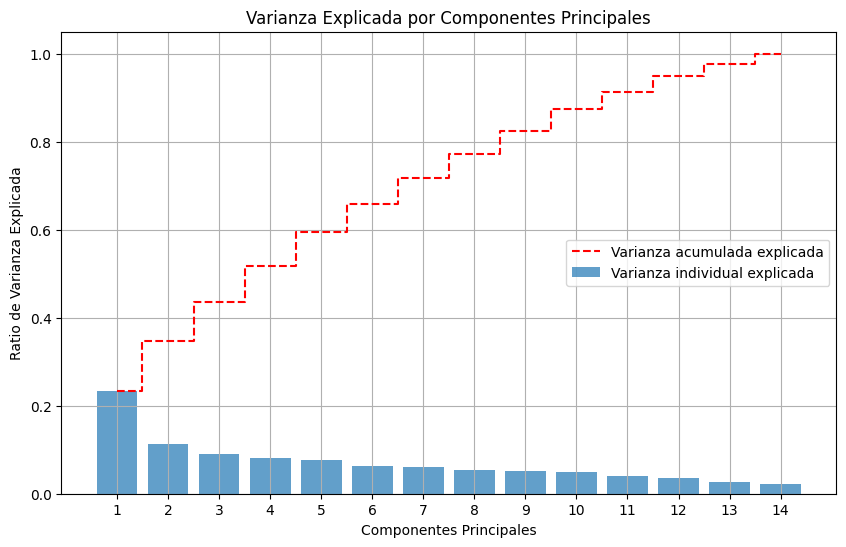


Primeras filas de los datos transformados por PCA (DataFrame: df_pca):
          0         1         2         3         4         5         6   \
0  2.509410 -0.336712 -0.351458 -1.195907 -0.170917 -0.045039 -0.389931   
1 -0.577042  0.550620  0.197837  0.195451 -0.242935 -0.238772 -0.279214   
2 -0.577045  0.550616  0.197841  0.195445 -0.242934 -0.238771 -0.279212   
3 -0.947788  0.027619  0.954299 -0.510983  0.023791 -0.082667 -0.094014   
4 -0.187627 -0.075127  1.167522  0.494471 -0.164365  1.065768  2.293706   

         7         8         9         10        11        12        13  
0  1.126766  0.480090  0.522982  0.101762  2.779682  1.420748  0.127249  
1 -0.291223  0.524502 -0.628624 -0.931172  0.500561  0.476065 -0.112417  
2 -0.291225  0.524495 -0.628617 -0.931168  0.500556  0.476065 -0.112417  
3 -0.448705 -0.543948  0.415290 -0.366270 -0.134150  0.389401 -0.101809  
4 -0.945053 -1.306938 -0.339626 -0.175747  0.072375  0.412761 -0.169173  

Número óptimo de componentes pr

In [122]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Importación de módulos para la Red Neuronal
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam # Optimizador Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # Métricas de evaluación
import seaborn as sns # Para la matriz de confusión

def realizar_pca_para_prediccion(df, variable_objetivo_nombre, columnas_a_eliminar):
    """
    Implementa un PCA para reducir la dimensionalidad de las variables predictoras
    y muestra los resultados para predecir una variable objetivo específica.
    Elimina columnas especificadas antes de realizar el PCA.

    Parámetros:
    df (DataFrame): DataFrame de pandas que contiene los datos.
    variable_objetivo_nombre (str): Nombre de la columna que se usará como variable objetivo.
    columnas_a_eliminar (list): Lista de nombres de columnas para eliminar del DataFrame antes del PCA.

    Retorna:
    tuple: Una tupla que contiene:
        - df_pca_optimo (DataFrame): DataFrame con los datos transformados por PCA usando el número óptimo de componentes.
        - y (Series): La variable objetivo.
        - n_componentes_optimo (int): Número óptimo de componentes principales.
        - variables_enzimas (list): Lista de variables predictoras (enzimas) utilizadas para PCA.
        - columnas_eliminadas_realmente (list): Lista de columnas realmente eliminadas antes del PCA.
    """

    # 0. Eliminar las columnas especificadas
    columnas_originales = df.columns.tolist() # Guarda las columnas originales para mensaje informativo
    df = df.drop(columns=columnas_a_eliminar, errors='ignore') # Usar errors='ignore' para evitar errores si alguna columna no existe
    columnas_eliminadas_realmente = [col for col in columnas_a_eliminar if col in columnas_originales] # Lista de columnas realmente eliminadas

    print(f"Columnas eliminadas antes del PCA: {columnas_eliminadas_realmente}")

    variables_enzimas = [col for col in df.columns if col not in [variable_objetivo_nombre, 'ESBL']] # Excluimos 'ESBL' también, si es relevante

    X = df[variables_enzimas]
    y = df[variable_objetivo_nombre]

    # 2. Manejar valores faltantes (Imputación con la moda) - Opcional, pero recomendado
    for columna in X.columns:
        moda_columna = X[columna].mode()
        if not moda_columna.empty:
            valor_moda = moda_columna[0]
            X[columna] = X[columna].fillna(valor_moda) # Reasignación para evitar SettingWithCopyWarning y FutureWarning
        else:
            print(f"Advertencia: No se pudo imputar la columna '{columna}' porque no tiene moda. Se rellenan los NaN con 0.")
            X[columna] = X[columna].fillna(0) # Reasignación para evitar SettingWithCopyWarning y FutureWarning

    # 3. Estandarizar las variables predictoras
    scaler = StandardScaler()
    X_escalado = scaler.fit_transform(X)

    # 4. Aplicar PCA
    pca = PCA() # Puedes especificar n_components si lo conoces o quieres probar
    pca.fit(X_escalado)

    # 5. Determinar la varianza explicada por cada componente principal
    varianza_explicada = pca.explained_variance_ratio_
    varianza_acumulada = np.cumsum(varianza_explicada)

    print("\nVarianza Explicada por Componente Principal:\n", varianza_explicada)
    print("\nVarianza Acumulada por Componente Principal:\n", varianza_acumulada)

    # 6. Visualización de la varianza explicada
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada, alpha=0.7, align='center',
            label='Varianza individual explicada')
    plt.step(range(1, len(varianza_acumulada) + 1), varianza_acumulada, where='mid', linestyle='--', color='red',label='Varianza acumulada explicada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.xticks(range(1, len(varianza_explicada) + 1))
    plt.legend(loc='center right')
    plt.title('Varianza Explicada por Componentes Principales')
    plt.grid(True)
    plt.show()
    # [Image of Bar and Step plot showing explained variance and cumulative explained variance for PCA components]

    # 7. Transformar los datos al espacio de los componentes principales
    X_pca = pca.transform(X_escalado)
    df_pca = pd.DataFrame(data=X_pca, index=df.index) # Puedes poner nombres de columnas si lo deseas
    print("\nPrimeras filas de los datos transformados por PCA (DataFrame: df_pca):\n", df_pca.head())

    # 8. (Opcional) Seleccionar un número de componentes principales basado en la varianza acumulada
    n_componentes_optimo = np.argmax(varianza_acumulada >= 0.95) + 1 # Ejemplo: 95% de varianza
    print(f"\nNúmero óptimo de componentes principales para explicar al menos el 95% de la varianza: {n_componentes_optimo}")

    pca_optimo = PCA(n_components=n_componentes_optimo)
    pca_optimo.fit(X_escalado)
    X_pca_optimo = pca_optimo.transform(X_escalado)
    df_pca_optimo = pd.DataFrame(data=X_pca_optimo, index=df.index)
    print(f"\nPrimeras filas de los datos transformados por PCA (con {n_componentes_optimo} componentes - DataFrame: df_pca_optimo):\n", df_pca_optimo.head())

    print("\n--- Resumen del PCA ---")
    print(f"Variables predictoras (enzimas) usadas para PCA: {variables_enzimas}")
    print(f"Variable objetivo para predicción: {variable_objetivo_nombre}")
    print(f"Columnas eliminadas antes del PCA: {columnas_eliminadas_realmente}") # Mensaje con las columnas REALMENTE eliminadas
    print("\nResultados detallados (varianza explicada, datos transformados, etc.) han sido impresos y visualizados.")
    print("El DataFrame 'df_pca' contiene los datos transformados por PCA con todos los componentes.")
    print(f"El DataFrame 'df_pca_optimo' (opcional) contiene los datos transformados con {n_componentes_optimo} componentes principales (si se calculó un número óptimo).")

    return df_pca_optimo, y, n_componentes_optimo, variables_enzimas, columnas_eliminadas_realmente


def implementar_red_neuronal(df_pca_optimo, y, variable_objetivo_nombre, n_componentes_optimo):
    """
    Implementa una red neuronal para la predicción de la variable objetivo
    utilizando los componentes principales del PCA.

    Parámetros:
    df_pca_optimo (DataFrame): DataFrame con los datos transformados por PCA (componentes óptimos).
    y (Series): Variable objetivo.
    variable_objetivo_nombre (str): Nombre de la variable objetivo.
    n_componentes_optimo (int): Número óptimo de componentes principales usados.

    Retorna:
    None: Imprime resultados de la red neuronal (matriz de confusión, informe de clasificación, accuracy).
    """

    print("\n--- Implementando Red Neuronal ---")
    print(f"Usando {n_componentes_optimo} componentes principales del PCA como input.")

    # 1. Preparar los datos para la Red Neuronal
    X_train, X_test, y_train, y_test = train_test_split(df_pca_optimo, y, test_size=0.3, random_state=42, stratify=y) # estratificación importante para clases desbalanceadas

    # 2. Definir la arquitectura del modelo de Red Neuronal
    modelo = Sequential()
    modelo.add(Dense(128, activation='relu', input_shape=(n_componentes_optimo,))) # Capa de entrada y primera capa oculta
    modelo.add(Dense(64, activation='relu')) # Capa oculta adicional
    modelo.add(Dense(1, activation='sigmoid')) # Capa de salida para clasificación binaria (sigmoid para 'ESBL' en este caso)

    # 3. Compilar el modelo
    modelo.compile(optimizer=Adam(learning_rate=0.001), # Optimizador Adam con learning rate ajustable
                   loss='binary_crossentropy', # Función de pérdida para clasificación binaria
                   metrics=['accuracy']) # Métrica para evaluar el modelo

    # 4. Entrenar el modelo
    # 4. Entrenar el modelo
    print("\nData types of X_train:")
    print(X_train.dtypes)
    print("\nData types of y_train:")
    print(y_train.dtypes)
    print("\nEntrenando la Red Neuronal...")
    history = modelo.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0) # Ajustar epochs y batch_size según necesidad 

    # 5. Evaluar el modelo
    print("\nEvaluando el modelo...")
    y_pred_prob = modelo.predict(X_test) # Predicciones en probabilidad
    y_pred = (y_pred_prob > 0.5).astype(int) # Convertir probabilidades a clases (0 o 1)

    print("\n--- Resultados de la Red Neuronal ---")
    print("\nInforme de Clasificación:\n", classification_report(y_test, y_pred))
    print("\nMatriz de Confusión:\n")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[0, 1], yticklabels=[0, 1]) # Ajustar etiquetas si es necesario
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.title('Matriz de Confusión')
    plt.show()
    # [Image of Heatmap showing the confusion matrix of the Neural Network model]
    print("\nAccuracy del modelo:", accuracy_score(y_test, y_pred))

    print("\n--- Fin de la Implementación de la Red Neuronal ---")


# --- Código principal ---
variable_objetivo = 'ESBL'

# Define las columnas a eliminar
columnas_a_eliminar_pca = ['PATIENT_ID', 'SEX', 'DATE_BIRTH', 'AGE', 'WARD', 'SPEC_DATE', 'SPEC_TYPE', 'ORGANISM'] # Lista de columnas a eliminar no tener en cuenta



# Ejecutar PCA y obtener resultados necesarios para la Red Neuronal
pca_results = realizar_pca_para_prediccion(df_imputado_moda.copy(), variable_objetivo, columnas_a_eliminar_pca)


Columnas eliminadas antes del PCA: ['PATIENT_ID', 'SEX', 'DATE_BIRTH', 'AGE', 'WARD', 'SPEC_DATE', 'SPEC_TYPE', 'ORGANISM']

Data type of y (variable objetivo 'ESBL') after conversion to 1/0 and int: int64

Varianza Explicada por Componente Principal:
 [0.23248055 0.11409283 0.08949827 0.08128718 0.07733339 0.06380072
 0.05984966 0.05453224 0.05202434 0.04870763 0.04019993 0.03614031
 0.02768977 0.02236318]

Varianza Acumulada por Componente Principal:
 [0.23248055 0.34657339 0.43607166 0.51735883 0.59469222 0.65849295
 0.71834261 0.77287485 0.82489919 0.87360682 0.91380675 0.94994706
 0.97763682 1.        ]


C:\Users\JUAN BERNAL\AppData\Local\Temp\ipykernel_3060\1992430007.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'+': 1, '-': 0}) # Reemplaza "+" por 1 y "-" por 0
C:\Users\JUAN BERNAL\AppData\Local\Temp\ipykernel_3060\1992430007.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[columna] = X[columna].fillna(valor_moda) # Reasignación para evitar SettingWithCopyWarning y FutureWarning


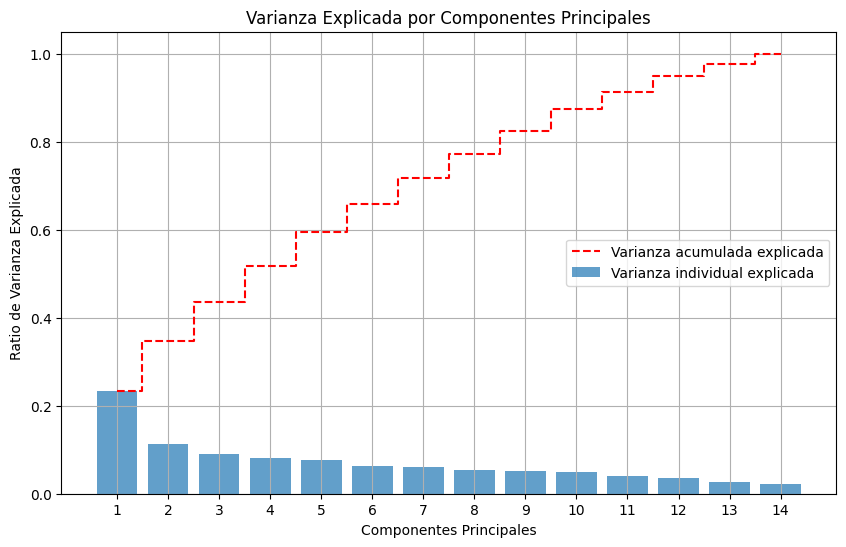


Primeras filas de los datos transformados por PCA (DataFrame: df_pca):
          0         1         2         3         4         5         6   \
0  2.509410 -0.336712 -0.351458 -1.195907 -0.170917 -0.045039 -0.389931   
1 -0.577042  0.550620  0.197837  0.195451 -0.242935 -0.238772 -0.279214   
2 -0.577045  0.550616  0.197841  0.195445 -0.242934 -0.238771 -0.279212   
3 -0.947788  0.027619  0.954299 -0.510983  0.023791 -0.082667 -0.094014   
4 -0.187627 -0.075127  1.167522  0.494471 -0.164365  1.065768  2.293706   

         7         8         9         10        11        12        13  
0  1.126766  0.480090  0.522982  0.101762  2.779682  1.420748  0.127249  
1 -0.291223  0.524502 -0.628624 -0.931172  0.500561  0.476065 -0.112417  
2 -0.291225  0.524495 -0.628617 -0.931168  0.500556  0.476065 -0.112417  
3 -0.448705 -0.543948  0.415290 -0.366270 -0.134150  0.389401 -0.101809  
4 -0.945053 -1.306938 -0.339626 -0.175747  0.072375  0.412761 -0.169173  

Número óptimo de componentes pr

c:\Users\JUAN BERNAL\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Evaluando el modelo...
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

--- Resultados de la Red Neuronal ---

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1967
           1       0.98      0.93      0.96       336

    accuracy                           0.99      2303
   macro avg       0.98      0.96      0.97      2303
weighted avg       0.99      0.99      0.99      2303


Matriz de Confusión:



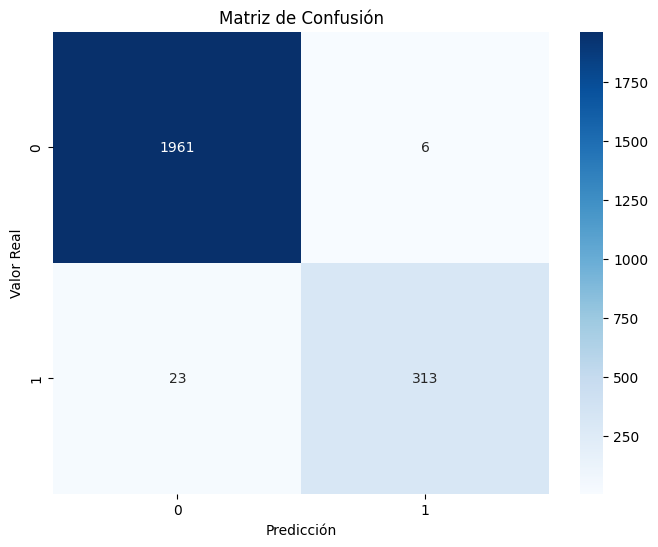


Accuracy del modelo: 0.9874077290490665

--- Fin de la Implementación de la Red Neuronal ---

--- Proceso de PCA y Red Neuronal completado ---


In [123]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Importación de módulos para la Red Neuronal
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam # Optimizador Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # Métricas de evaluación
import seaborn as sns # Para la matriz de confusión

def realizar_pca_para_prediccion(df, variable_objetivo_nombre, columnas_a_eliminar):
    """
    Implementa un PCA para reducir la dimensionalidad de las variables predictoras
    y muestra los resultados para predecir una variable objetivo específica.
    Elimina columnas especificadas antes de realizar el PCA.

    Parámetros:
    df (DataFrame): DataFrame de pandas que contiene los datos.
    variable_objetivo_nombre (str): Nombre de la columna que se usará como variable objetivo.
    columnas_a_eliminar (list): Lista de nombres de columnas para eliminar del DataFrame antes del PCA.

    Retorna:
    tuple: Una tupla que contiene:
        - df_pca_optimo (DataFrame): DataFrame con los datos transformados por PCA usando el número óptimo de componentes.
        - y (Series): La variable objetivo.
        - n_componentes_optimo (int): Número óptimo de componentes principales.
        - variables_enzimas (list): Lista de variables predictoras (enzimas) utilizadas para PCA.
        - columnas_eliminadas_realmente (list): Lista de columnas realmente eliminadas antes del PCA.
    """

    # 0. Eliminar las columnas especificadas
    columnas_originales = df.columns.tolist() # Guarda las columnas originales para mensaje informativo
    df = df.drop(columns=columnas_a_eliminar, errors='ignore') # Usar errors='ignore' para evitar errores si alguna columna no existe
    columnas_eliminadas_realmente = [col for col in columnas_a_eliminar if col in columnas_originales] # Lista de columnas realmente eliminadas

    print(f"Columnas eliminadas antes del PCA: {columnas_eliminadas_realmente}")

    variables_enzimas = [col for col in df.columns if col not in [variable_objetivo_nombre, 'ESBL']] # Excluimos 'ESBL' también, si es relevante

    X = df[variables_enzimas]
    y = df[variable_objetivo_nombre]

    # **NUEVO CÓDIGO PARA CONVERTIR "+" y "-" a 1 y 0**
    y = y.replace({'+': 1, '-': 0}) # Reemplaza "+" por 1 y "-" por 0
    y = y.astype(int) # Ahora sí, convierte a tipo entero (tras la sustitución)
    print(f"\nData type of y (variable objetivo '{variable_objetivo_nombre}') after conversion to 1/0 and int:", y.dtypes) # Imprime el tipo de dato para verificar


    # 2. Manejar valores faltantes (Imputación con la moda) - Opcional, pero recomendado
    for columna in X.columns:
        moda_columna = X[columna].mode()
        if not moda_columna.empty:
            valor_moda = moda_columna[0]
            X[columna] = X[columna].fillna(valor_moda) # Reasignación para evitar SettingWithCopyWarning y FutureWarning
        else:
            print(f"Advertencia: No se pudo imputar la columna '{columna}' porque no tiene moda. Se rellenan los NaN con 0.")
            X[columna] = X[columna].fillna(0) # Reasignación para evitar SettingWithCopyWarning y FutureWarning

    # 3. Estandarizar las variables predictoras
    scaler = StandardScaler()
    X_escalado = scaler.fit_transform(X)

    # 4. Aplicar PCA
    pca = PCA() # Puedes especificar n_components si lo conoces o quieres probar
    pca.fit(X_escalado)

    # 5. Determinar la varianza explicada por cada componente principal
    varianza_explicada = pca.explained_variance_ratio_
    varianza_acumulada = np.cumsum(varianza_explicada)

    print("\nVarianza Explicada por Componente Principal:\n", varianza_explicada)
    print("\nVarianza Acumulada por Componente Principal:\n", varianza_acumulada)

    # 6. Visualización de la varianza explicada
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada, alpha=0.7, align='center',
            label='Varianza individual explicada')
    plt.step(range(1, len(varianza_acumulada) + 1), varianza_acumulada, where='mid', linestyle='--', color='red',label='Varianza acumulada explicada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.xticks(range(1, len(varianza_explicada) + 1))
    plt.legend(loc='center right')
    plt.title('Varianza Explicada por Componentes Principales')
    plt.grid(True)
    plt.show()
    # [Image of Bar and Step plot showing explained variance and cumulative explained variance for PCA components]

    # 7. Transformar los datos al espacio de los componentes principales
    X_pca = pca.transform(X_escalado)
    df_pca = pd.DataFrame(data=X_pca, index=df.index) # Puedes poner nombres de columnas si lo deseas
    print("\nPrimeras filas de los datos transformados por PCA (DataFrame: df_pca):\n", df_pca.head())

    # 8. (Opcional) Seleccionar un número de componentes principales basado en la varianza acumulada
    n_componentes_optimo = np.argmax(varianza_acumulada >= 0.95) + 1 # Ejemplo: 95% de varianza
    print(f"\nNúmero óptimo de componentes principales para explicar al menos el 95% de la varianza: {n_componentes_optimo}")

    pca_optimo = PCA(n_components=n_componentes_optimo)
    pca_optimo.fit(X_escalado)
    X_pca_optimo = pca_optimo.transform(X_escalado)
    df_pca_optimo = pd.DataFrame(data=X_pca_optimo, index=df.index)
    print(f"\nPrimeras filas de los datos transformados por PCA (con {n_componentes_optimo} componentes - DataFrame: df_pca_optimo):\n", df_pca_optimo.head())

    print("\n--- Resumen del PCA ---")
    print(f"Variables predictoras (enzimas) usadas para PCA: {variables_enzimas}")
    print(f"Variable objetivo para predicción: {variable_objetivo_nombre}")
    print(f"Columnas eliminadas antes del PCA: {columnas_eliminadas_realmente}") # Mensaje con las columnas REALMENTE eliminadas
    print("\nResultados detallados (varianza explicada, datos transformados, etc.) han sido impresos y visualizados.")
    print("El DataFrame 'df_pca' contiene los datos transformados por PCA con todos los componentes.")
    print(f"El DataFrame 'df_pca_optimo' (opcional) contiene los datos transformados con {n_componentes_optimo} componentes principales (si se calculó un número óptimo).")

    return df_pca_optimo, y, n_componentes_optimo, variables_enzimas, columnas_eliminadas_realmente


def implementar_red_neuronal(df_pca_optimo, y, variable_objetivo_nombre, n_componentes_optimo):
    """
    Implementa una red neuronal para la predicción de la variable objetivo
    utilizando los componentes principales del PCA.

    Parámetros:
    df_pca_optimo (DataFrame): DataFrame con los datos transformados por PCA (componentes óptimos).
    y (Series): Variable objetivo.
    variable_objetivo_nombre (str): Nombre de la variable objetivo.
    n_componentes_optimo (int): Número óptimo de componentes principales usados.

    Retorna:
    None: Imprime resultados de la red neuronal (matriz de confusión, informe de clasificación, accuracy).
    """
    from tensorflow.keras.models import Sequential  # Asegúrate de importar Sequential y Dense
    from tensorflow.keras.layers import Dense
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    import matplotlib.pyplot as plt
    import seaborn as sns

    modelo = Sequential()
    print("\n--- Implementando Red Neuronal ---")
    print(f"Usando {n_componentes_optimo} componentes principales del PCA como input.")

    # 1. Preparar los datos para la Red Neuronal
    X_train, X_test, y_train, y_test = train_test_split(df_pca_optimo, y, test_size=0.3, random_state=42, stratify=y) # estratificación importante para clases desbalanceadas

    # --- Añadiendo capas a la Red Neuronal ---
    # En tu código original faltaba la definición de las capas de la red neuronal
    # Aquí te añado un ejemplo básico con una capa densa:
    modelo.add(Dense(128, activation='relu', input_shape=(n_componentes_optimo,))) # Capa de entrada y primera capa oculta
    modelo.add(Dense(1, activation='sigmoid')) # Capa de salida para clasificación binaria (sigmoid)

    # 2. Compilar el modelo (¡CORRECCIÓN IMPORTANTE!)
    print("\nCompilando el modelo...")
    modelo.compile(optimizer='adam',  # Optimizador común
                   loss='binary_crossentropy', # Función de pérdida para clasificación binaria
                   metrics=['accuracy'])      # Métrica para evaluar

    # 3. Imprimir data types (para debug, no es estrictamente necesario para la corrección del error)
    print("\nData types of X_train:")
    print(X_train.dtypes)
    print("\nData types of y_train:")
    print(y_train.dtypes)

    # 4. Entrenar el modelo
    print("\nEntrenando la Red Neuronal...")
    history = modelo.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0) # Ajustar epochs y batch_size según necesidad

    # 5. Evaluar el modelo
    print("\nEvaluando el modelo...")
    y_pred_prob = modelo.predict(X_test) # Predicciones en probabilidad
    y_pred = (y_pred_prob > 0.5).astype(int) # Convertir probabilidades a clases (0 o 1)

    # 6. Imprimir y visualizar resultados
    print("\n--- Resultados de la Red Neuronal ---")
    print("\nInforme de Clasificación:\n", classification_report(y_test, y_pred))
    print("\nMatriz de Confusión:\n")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=[0, 1], yticklabels=[0, 1]) # Ajustar etiquetas si es necesario
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.title('Matriz de Confusión')
    plt.show()
    # [Image of Heatmap showing the confusion matrix of the Neural Network model]
    print("\nAccuracy del modelo:", accuracy_score(y_test, y_pred))

    print("\n--- Fin de la Implementación de la Red Neuronal ---")

# --- Código principal ---
variable_objetivo = 'ESBL'

# Define las columnas a eliminar
columnas_a_eliminar_pca = ['PATIENT_ID', 'SEX', 'DATE_BIRTH', 'AGE', 'WARD', 'SPEC_DATE', 'SPEC_TYPE', 'ORGANISM'] # Lista de columnas a eliminar no tener en cuenta


# Ejecutar PCA y obtener resultados necesarios para la Red Neuronal
pca_results = realizar_pca_para_prediccion(df_imputado_moda.copy(), variable_objetivo, columnas_a_eliminar_pca)
df_pca_optimo, y, n_componentes_optimo, variables_enzimas, columnas_eliminadas_realmente = pca_results

# Implementar la Red Neuronal usando los resultados del PCA
implementar_red_neuronal(df_pca_optimo, y, variable_objetivo, n_componentes_optimo)


print("\n--- Proceso de PCA y Red Neuronal completado ---")

Columnas eliminadas antes del PCA: ['PATIENT_ID', 'SEX', 'DATE_BIRTH', 'AGE', 'WARD', 'SPEC_DATE', 'SPEC_TYPE', 'ORGANISM']

Data type of y (variable objetivo 'ESBL') after conversion to 1/0 and int: int64

Varianza Explicada por Componente Principal:
 [0.23248055 0.11409283 0.08949827 0.08128718 0.07733339 0.06380072
 0.05984966 0.05453224 0.05202434 0.04870763 0.04019993 0.03614031
 0.02768977 0.02236318]

Varianza Acumulada por Componente Principal:
 [0.23248055 0.34657339 0.43607166 0.51735883 0.59469222 0.65849295
 0.71834261 0.77287485 0.82489919 0.87360682 0.91380675 0.94994706
 0.97763682 1.        ]


C:\Users\JUAN BERNAL\AppData\Local\Temp\ipykernel_3060\1111904740.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'+': 1, '-': 0}) # Reemplaza "+" por 1 y "-" por 0
C:\Users\JUAN BERNAL\AppData\Local\Temp\ipykernel_3060\1111904740.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[columna] = X[columna].fillna(valor_moda) # Reasignación para evitar SettingWithCopyWarning y FutureWarning


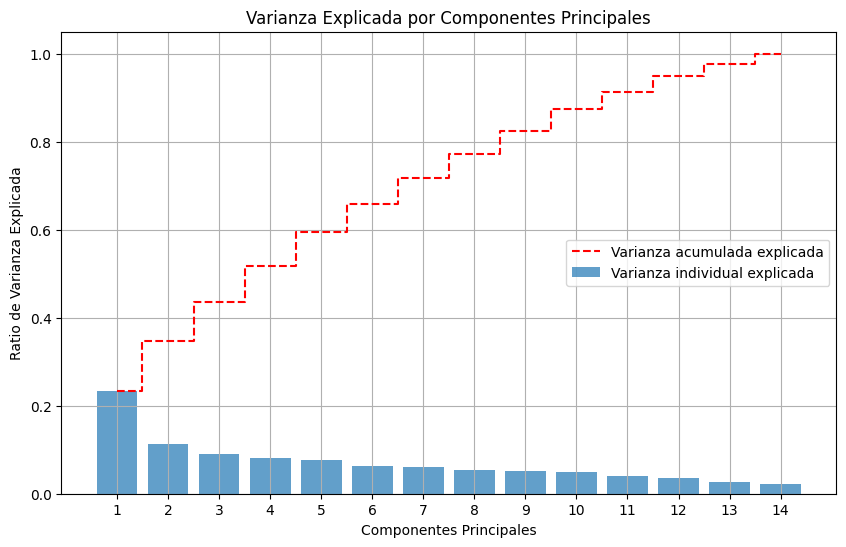


Primeras filas de los datos transformados por PCA (DataFrame: df_pca):
          0         1         2         3         4         5         6   \
0  2.509410 -0.336712 -0.351458 -1.195907 -0.170917 -0.045039 -0.389931   
1 -0.577042  0.550620  0.197837  0.195451 -0.242935 -0.238772 -0.279214   
2 -0.577045  0.550616  0.197841  0.195445 -0.242934 -0.238771 -0.279212   
3 -0.947788  0.027619  0.954299 -0.510983  0.023791 -0.082667 -0.094014   
4 -0.187627 -0.075127  1.167522  0.494471 -0.164365  1.065768  2.293706   

         7         8         9         10        11        12        13  
0  1.126766  0.480090  0.522982  0.101762  2.779682  1.420748  0.127249  
1 -0.291223  0.524502 -0.628624 -0.931172  0.500561  0.476065 -0.112417  
2 -0.291225  0.524495 -0.628617 -0.931168  0.500556  0.476065 -0.112417  
3 -0.448705 -0.543948  0.415290 -0.366270 -0.134150  0.389401 -0.101809  
4 -0.945053 -1.306938 -0.339626 -0.175747  0.072375  0.412761 -0.169173  

Número óptimo de componentes pr

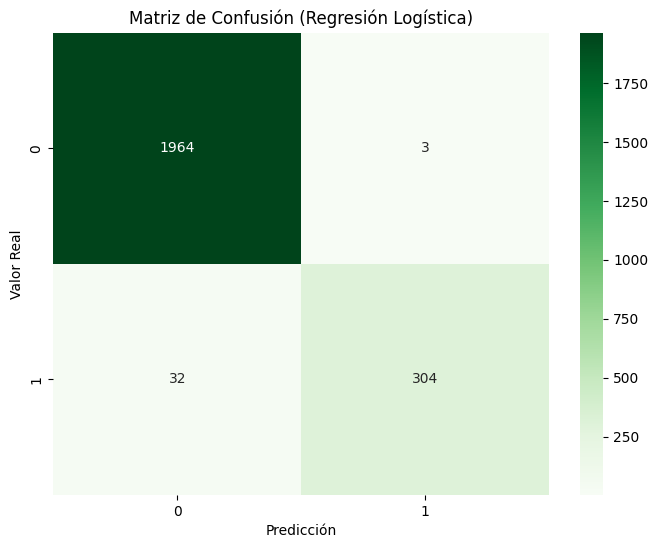


Accuracy del modelo de Regresión Logística: 0.9848024316109423

Probabilidades predichas (clase positiva): [0.00403628 0.12176267 0.27889726 ... 0.10542979 0.0098348  0.13124316]

--- Fin de la Implementación de la Regresión Logística ---

--- Proceso de PCA y Regresión Logística completado ---


In [124]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Importación de módulos para la Regresión Logística
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Modelo de Regresión Logística
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # Métricas de evaluación
import seaborn as sns # Para la matriz de confusión

def realizar_pca_para_prediccion(df, variable_objetivo_nombre, columnas_a_eliminar):
 """
 Implementa un PCA para reducir la dimensionalidad de las variables predictoras
 y muestra los resultados para predecir una variable objetivo específica.
 Elimina columnas especificadas antes de realizar el PCA.

 Parámetros:
 df (DataFrame): DataFrame de pandas que contiene los datos.
 variable_objetivo_nombre (str): Nombre de la columna que se usará como variable objetivo.
 columnas_a_eliminar (list): Lista de nombres de columnas para eliminar del DataFrame antes del PCA.

 Retorna:
 tuple: Una tupla que contiene:
  - df_pca_optimo (DataFrame): DataFrame con los datos transformados por PCA usando el número óptimo de componentes.
  - y (Series): La variable objetivo.
  - n_componentes_optimo (int): Número óptimo de componentes principales.
  - variables_enzimas (list): Lista de variables predictoras (enzimas) utilizadas para PCA.
  - columnas_eliminadas_realmente (list): Lista de columnas realmente eliminadas antes del PCA.
 """

 # 0. Eliminar las columnas especificadas
 columnas_originales = df.columns.tolist() # Guarda las columnas originales para mensaje informativo
 df = df.drop(columns=columnas_a_eliminar, errors='ignore') # Usar errors='ignore' para evitar errores si alguna columna no existe
 columnas_eliminadas_realmente = [col for col in columnas_a_eliminar if col in columnas_originales] # Lista de columnas realmente eliminadas

 print(f"Columnas eliminadas antes del PCA: {columnas_eliminadas_realmente}")

 variables_enzimas = [col for col in df.columns if col not in [variable_objetivo_nombre, 'ESBL']] # Excluimos 'ESBL' también, si es relevante

 X = df[variables_enzimas]
 y = df[variable_objetivo_nombre]

 # **NUEVO CÓDIGO PARA CONVERTIR "+" y "-" a 1 y 0**
 y = y.replace({'+': 1, '-': 0}) # Reemplaza "+" por 1 y "-" por 0
 y = y.astype(int) # Ahora sí, convierte a tipo entero (tras la sustitución)
 print(f"\nData type of y (variable objetivo '{variable_objetivo_nombre}') after conversion to 1/0 and int:", y.dtypes) # Imprime el tipo de dato para verificar


 # 2. Manejar valores faltantes (Imputación con la moda) - Opcional, pero recomendado
 for columna in X.columns:
  moda_columna = X[columna].mode()
  if not moda_columna.empty:
   valor_moda = moda_columna[0]
   X[columna] = X[columna].fillna(valor_moda) # Reasignación para evitar SettingWithCopyWarning y FutureWarning
  else:
   print(f"Advertencia: No se pudo imputar la columna '{columna}' porque no tiene moda. Se rellenan los NaN con 0.")
   X[columna] = X[columna].fillna(0) # Reasignación para evitar SettingWithCopyWarning y FutureWarning

 # 3. Estandarizar las variables predictoras
 scaler = StandardScaler()
 X_escalado = scaler.fit_transform(X)

 # 4. Aplicar PCA
 pca = PCA() # Puedes especificar n_components si lo conoces o quieres probar
 pca.fit(X_escalado)

 # 5. Determinar la varianza explicada por cada componente principal
 varianza_explicada = pca.explained_variance_ratio_
 varianza_acumulada = np.cumsum(varianza_explicada)

 print("\nVarianza Explicada por Componente Principal:\n", varianza_explicada)
 print("\nVarianza Acumulada por Componente Principal:\n", varianza_acumulada)

 # 6. Visualización de la varianza explicada
 plt.figure(figsize=(10, 6))
 plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada, alpha=0.7, align='center',
   label='Varianza individual explicada')
 plt.step(range(1, len(varianza_acumulada) + 1), varianza_acumulada, where='mid', linestyle='--', color='red',
   label='Varianza acumulada explicada')
 plt.ylabel('Ratio de Varianza Explicada')
 plt.xlabel('Componentes Principales')
 plt.xticks(range(1, len(varianza_explicada) + 1))
 plt.legend(loc='center right')
 plt.title('Varianza Explicada por Componentes Principales')
 plt.grid(True)
 plt.show()
 # [Image of Bar and Step plot showing explained variance and cumulative explained variance for PCA components]

 # 7. Transformar los datos al espacio de los componentes principales
 X_pca = pca.transform(X_escalado)
 df_pca = pd.DataFrame(data=X_pca, index=df.index) # Puedes poner nombres de columnas si lo deseas
 print("\nPrimeras filas de los datos transformados por PCA (DataFrame: df_pca):\n", df_pca.head())

 # 8. (Opcional) Seleccionar un número de componentes principales basado en la varianza acumulada
 n_componentes_optimo = np.argmax(varianza_acumulada >= 0.95) + 1 # Ejemplo: 95% de varianza
 print(f"\nNúmero óptimo de componentes principales para explicar al menos el 95% de la varianza: {n_componentes_optimo}")

 pca_optimo = PCA(n_components=n_componentes_optimo)
 pca_optimo.fit(X_escalado)
 X_pca_optimo = pca_optimo.transform(X_escalado)
 df_pca_optimo = pd.DataFrame(data=X_pca_optimo, index=df.index)
 print(f"\nPrimeras filas de los datos transformados por PCA (con {n_componentes_optimo} componentes - DataFrame: df_pca_optimo):\n", df_pca_optimo.head())

 print("\n--- Resumen del PCA ---")
 print(f"Variables predictoras (enzimas) usadas para PCA: {variables_enzimas}")
 print(f"Variable objetivo para predicción: {variable_objetivo_nombre}")
 print(f"Columnas eliminadas antes del PCA: {columnas_eliminadas_realmente}") # Mensaje con las columnas REALMENTE eliminadas
 print("\nResultados detallados (varianza explicada, datos transformados, etc.) han sido impresos y visualizados.")
 print("El DataFrame 'df_pca' contiene los datos transformados por PCA con todos los componentes.")
 print(f"El DataFrame 'df_pca_optimo' (opcional) contiene los datos transformados con {n_componentes_optimo} componentes principales (si se calculó un número óptimo).")

 return df_pca_optimo, y, n_componentes_optimo, variables_enzimas, columnas_eliminadas_realmente


def implementar_regresion_logistica(df_pca_optimo, y, variable_objetivo_nombre, n_componentes_optimo):
 """
 Implementa una regresión logística para la predicción de la variable objetivo
 utilizando los componentes principales del PCA.

 Parámetros:
 df_pca_optimo (DataFrame): DataFrame con los datos transformados por PCA (componentes óptimos).
 y (Series): Variable objetivo.
 variable_objetivo_nombre (str): Nombre de la variable objetivo.
 n_componentes_optimo (int): Número óptimo de componentes principales usados.

 Retorna:
 None: Imprime resultados de la regresión logística (matriz de confusión, informe de clasificación, accuracy).
 """
 from sklearn.linear_model import LogisticRegression
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 import matplotlib.pyplot as plt
 import seaborn as sns

 print("\n--- Implementando Regresión Logística ---")
 print(f"Usando {n_componentes_optimo} componentes principales del PCA como input.")

 # 1. Preparar los datos para la Regresión Logística
 X_train, X_test, y_train, y_test = train_test_split(df_pca_optimo, y, test_size=0.3, random_state=42, stratify=y) # estratificación importante para clases desbalanceadas

 # 2. Inicializar y entrenar el modelo de Regresión Logística
 print("\nEntrenando el modelo de Regresión Logística...")
 modelo_rl = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' es adecuado para datasets pequeños
 modelo_rl.fit(X_train, y_train)

 # 3. Realizar predicciones en el conjunto de prueba
 print("\nRealizando predicciones con Regresión Logística...")
 y_pred = modelo_rl.predict(X_test)

 # 4. Evaluar el modelo
 print("\nEvaluando el modelo de Regresión Logística...")

 # 5. Imprimir y visualizar resultados
 print("\n--- Resultados de la Regresión Logística ---")
 print("\nInforme de Clasificación:\n", classification_report(y_test, y_pred))
 print("\nMatriz de Confusión:\n")
 cm = confusion_matrix(y_test, y_pred)
 plt.figure(figsize=(8, 6))
 sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', # Cambiado el mapa de color a 'Greens'
     xticklabels=[0, 1], yticklabels=[0, 1]) # Ajustar etiquetas si es necesario
 plt.xlabel('Predicción')
 plt.ylabel('Valor Real')
 plt.title('Matriz de Confusión (Regresión Logística)') # Título actualizado
 plt.show()
 # [Image of Heatmap showing the confusion matrix of the Logistic Regression model]
 print("\nAccuracy del modelo de Regresión Logística:", accuracy_score(y_test, y_pred))

 # ---  Valores Estadísticos Adicionales (Opcional, pero útil en RL) ---
 # Puedes agregar más análisis estadísticos aquí si es necesario, como probabilidades predichas, coeficientes del modelo, etc.
 # Por ejemplo, para obtener las probabilidades predichas:
 y_pred_prob = modelo_rl.predict_proba(X_test)[:, 1] # Probabilidades de la clase positiva (clase 1)
 print("\nProbabilidades predichas (clase positiva):", y_pred_prob[:])
 print("\n--- Fin de la Implementación de la Regresión Logística ---")


# --- Código principal ---
variable_objetivo = 'ESBL'

# Define las columnas a eliminar
columnas_a_eliminar_pca = ['PATIENT_ID', 'SEX', 'DATE_BIRTH', 'AGE', 'WARD', 'SPEC_DATE', 'SPEC_TYPE', 'ORGANISM'] # Lista de columnas a eliminar no tener en cuenta

# Ejecutar PCA y obtener resultados necesarios para la Regresión Logística
pca_results = realizar_pca_para_prediccion(df_imputado_moda.copy(), variable_objetivo, columnas_a_eliminar_pca)
df_pca_optimo, y, n_componentes_optimo, variables_enzimas, columnas_eliminadas_realmente = pca_results

# Implementar la Regresión Logística usando los resultados del PCA
implementar_regresion_logistica(df_pca_optimo, y, variable_objetivo, n_componentes_optimo)


print("\n--- Proceso de PCA y Regresión Logística completado ---")

Columnas eliminadas antes del PCA: ['PATIENT_ID', 'SEX', 'DATE_BIRTH', 'AGE', 'WARD', 'SPEC_DATE', 'SPEC_TYPE', 'ORGANISM']

Data type of y (variable objetivo 'ESBL') after conversion to 1/0 and int: int64

Varianza Explicada por Componente Principal:
 [0.23248055 0.11409283 0.08949827 0.08128718 0.07733339 0.06380072
 0.05984966 0.05453224 0.05202434 0.04870763 0.04019993 0.03614031
 0.02768977 0.02236318]

Varianza Acumulada por Componente Principal:
 [0.23248055 0.34657339 0.43607166 0.51735883 0.59469222 0.65849295
 0.71834261 0.77287485 0.82489919 0.87360682 0.91380675 0.94994706
 0.97763682 1.        ]


C:\Users\JUAN BERNAL\AppData\Local\Temp\ipykernel_3060\2208640611.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'+': 1, '-': 0}) # Reemplaza "+" por 1 y "-" por 0
C:\Users\JUAN BERNAL\AppData\Local\Temp\ipykernel_3060\2208640611.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[columna] = X[columna].fillna(valor_moda) # Reasignación para evitar SettingWithCopyWarning y FutureWarning


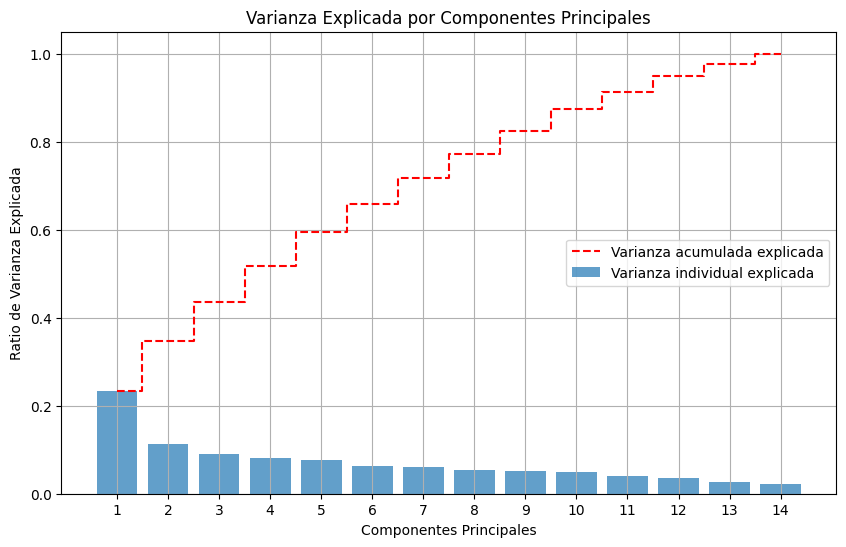


Primeras filas de los datos transformados por PCA (DataFrame: df_pca):
          0         1         2         3         4         5         6   \
0  2.509410 -0.336712 -0.351458 -1.195907 -0.170917 -0.045039 -0.389931   
1 -0.577042  0.550620  0.197837  0.195451 -0.242935 -0.238772 -0.279214   
2 -0.577045  0.550616  0.197841  0.195445 -0.242934 -0.238771 -0.279212   
3 -0.947788  0.027619  0.954299 -0.510983  0.023791 -0.082667 -0.094014   
4 -0.187627 -0.075127  1.167522  0.494471 -0.164365  1.065768  2.293706   

         7         8         9         10        11        12        13  
0  1.126766  0.480090  0.522982  0.101762  2.779682  1.420748  0.127249  
1 -0.291223  0.524502 -0.628624 -0.931172  0.500561  0.476065 -0.112417  
2 -0.291225  0.524495 -0.628617 -0.931168  0.500556  0.476065 -0.112417  
3 -0.448705 -0.543948  0.415290 -0.366270 -0.134150  0.389401 -0.101809  
4 -0.945053 -1.306938 -0.339626 -0.175747  0.072375  0.412761 -0.169173  

Número óptimo de componentes pr

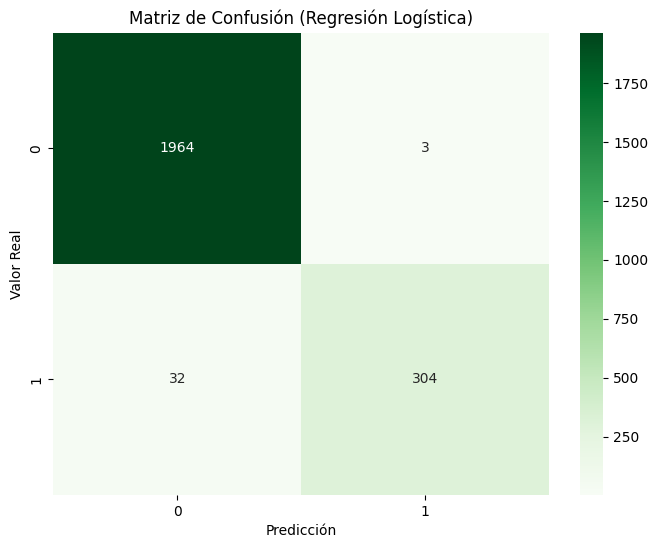


Accuracy del modelo de Regresión Logística: 0.9848024316109423

Primeras 5 probabilidades predichas (clase positiva): [0.00403628 0.12176267 0.27889726 0.00403628 0.01074419]

--- Fin de la Implementación de la Regresión Logística ---

--- Implementando SVM (Support Vector Machine) ---
Usando 13 componentes principales del PCA como input.

Entrenando el modelo SVM...

Realizando predicciones con SVM...

Evaluando el modelo SVM...

--- Resultados del modelo SVM ---

Informe de Clasificación (SVM):
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1967
           1       0.97      0.92      0.95       336

    accuracy                           0.98      2303
   macro avg       0.98      0.96      0.97      2303
weighted avg       0.98      0.98      0.98      2303


Matriz de Confusión (SVM):



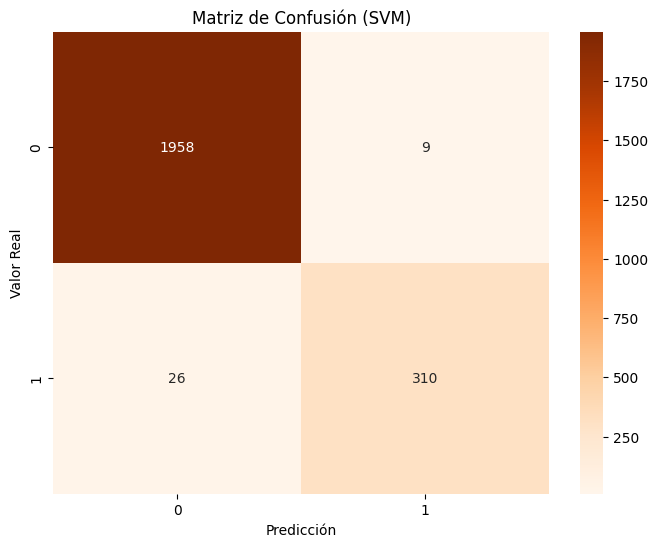


Accuracy del modelo SVM: 0.9848024316109423

Primeras 5 probabilidades predichas por SVM (clase positiva): [0.00865033 0.01064065 0.12389803 0.00865033 0.00452706]

--- Fin de la Implementación de SVM ---

--- Implementando Random Forest ---
Usando 13 componentes principales del PCA como input.

Entrenando el modelo Random Forest...

Realizando predicciones con Random Forest...

Evaluando el modelo Random Forest...

--- Resultados del modelo Random Forest ---

Informe de Clasificación (Random Forest):
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1967
           1       0.98      0.92      0.95       336

    accuracy                           0.99      2303
   macro avg       0.98      0.96      0.97      2303
weighted avg       0.99      0.99      0.99      2303


Matriz de Confusión (Random Forest):



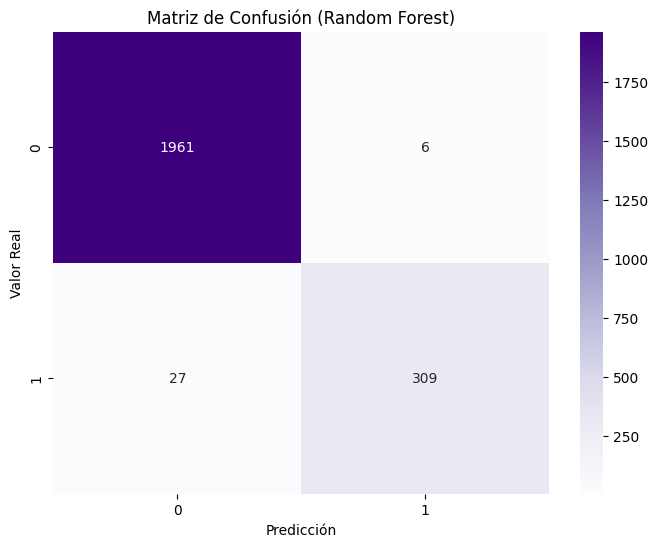


Accuracy del modelo Random Forest: 0.985670864090317

Importancia de las características (basado en componentes principales del PCA):
Componente Principal 1: 0.2953
Componente Principal 2: 0.2355
Componente Principal 3: 0.0164
Componente Principal 4: 0.0877
Componente Principal 5: 0.0165
Componente Principal 6: 0.0175
Componente Principal 7: 0.0231
Componente Principal 8: 0.0206
Componente Principal 9: 0.0241
Componente Principal 10: 0.0175
Componente Principal 11: 0.0261
Componente Principal 12: 0.1323
Componente Principal 13: 0.0874

Primeras 5 probabilidades predichas por Random Forest (clase positiva): [0.   0.   0.47 0.   0.  ]

--- Fin de la Implementación de Random Forest ---

--- Proceso de PCA y modelos de Clasificación (Regresión Logística, SVM, Random Forest) completado ---


In [125]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Importación de módulos para SVM y Random Forest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # Modelo de Regresión Logística (mantenemos para comparacion)
from sklearn.svm import SVC # Modelo SVM
from sklearn.ensemble import RandomForestClassifier # Modelo Random Forest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # Métricas de evaluación
import seaborn as sns # Para la matriz de confusión

def realizar_pca_para_prediccion(df, variable_objetivo_nombre, columnas_a_eliminar):
 """
 Implementa un PCA para reducir la dimensionalidad de las variables predictoras
 y muestra los resultados para predecir una variable objetivo específica.
 Elimina columnas especificadas antes de realizar el PCA.

 Parámetros:
 df (DataFrame): DataFrame de pandas que contiene los datos.
 variable_objetivo_nombre (str): Nombre de la columna que se usará como variable objetivo.
 columnas_a_eliminar (list): Lista de nombres de columnas para eliminar del DataFrame antes del PCA.

 Retorna:
 tuple: Una tupla que contiene:
  - df_pca_optimo (DataFrame): DataFrame con los datos transformados por PCA usando el número óptimo de componentes.
  - y (Series): La variable objetivo.
  - n_componentes_optimo (int): Número óptimo de componentes principales.
  - variables_enzimas (list): Lista de variables predictoras (enzimas) utilizadas para PCA.
  - columnas_eliminadas_realmente (list): Lista de columnas realmente eliminadas antes del PCA.
 """

 # 0. Eliminar las columnas especificadas
 columnas_originales = df.columns.tolist() # Guarda las columnas originales para mensaje informativo
 df = df.drop(columns=columnas_a_eliminar, errors='ignore') # Usar errors='ignore' para evitar errores si alguna columna no existe
 columnas_eliminadas_realmente = [col for col in columnas_a_eliminar if col in columnas_originales] # Lista de columnas realmente eliminadas

 print(f"Columnas eliminadas antes del PCA: {columnas_eliminadas_realmente}")

 variables_enzimas = [col for col in df.columns if col not in [variable_objetivo_nombre, 'ESBL']] # Excluimos 'ESBL' también, si es relevante

 X = df[variables_enzimas]
 y = df[variable_objetivo_nombre]

 # **NUEVO CÓDIGO PARA CONVERTIR "+" y "-" a 1 y 0**
 y = y.replace({'+': 1, '-': 0}) # Reemplaza "+" por 1 y "-" por 0
 y = y.astype(int) # Ahora sí, convierte a tipo entero (tras la sustitución)
 print(f"\nData type of y (variable objetivo '{variable_objetivo_nombre}') after conversion to 1/0 and int:", y.dtypes) # Imprime el tipo de dato para verificar


 # 2. Manejar valores faltantes (Imputación con la moda) - Opcional, pero recomendado
 for columna in X.columns:
  moda_columna = X[columna].mode()
  if not moda_columna.empty:
   valor_moda = moda_columna[0]
   X[columna] = X[columna].fillna(valor_moda) # Reasignación para evitar SettingWithCopyWarning y FutureWarning
  else:
   print(f"Advertencia: No se pudo imputar la columna '{columna}' porque no tiene moda. Se rellenan los NaN con 0.")
   X[columna] = X[columna].fillna(0) # Reasignación para evitar SettingWithCopyWarning y FutureWarning

 # 3. Estandarizar las variables predictoras
 scaler = StandardScaler()
 X_escalado = scaler.fit_transform(X)

 # 4. Aplicar PCA
 pca = PCA() # Puedes especificar n_components si lo conoces o quieres probar
 pca.fit(X_escalado)

 # 5. Determinar la varianza explicada por cada componente principal
 varianza_explicada = pca.explained_variance_ratio_
 varianza_acumulada = np.cumsum(varianza_explicada)

 print("\nVarianza Explicada por Componente Principal:\n", varianza_explicada)
 print("\nVarianza Acumulada por Componente Principal:\n", varianza_acumulada)

 # 6. Visualización de la varianza explicada
 plt.figure(figsize=(10, 6))
 plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada, alpha=0.7, align='center',
   label='Varianza individual explicada')
 plt.step(range(1, len(varianza_acumulada) + 1), varianza_acumulada, where='mid', linestyle='--', color='red',
   label='Varianza acumulada explicada')
 plt.ylabel('Ratio de Varianza Explicada')
 plt.xlabel('Componentes Principales')
 plt.xticks(range(1, len(varianza_explicada) + 1))
 plt.legend(loc='center right')
 plt.title('Varianza Explicada por Componentes Principales')
 plt.grid(True)
 plt.show()
 # [Image of Bar and Step plot showing explained variance and cumulative explained variance for PCA components]

 # 7. Transformar los datos al espacio de los componentes principales
 X_pca = pca.transform(X_escalado)
 df_pca = pd.DataFrame(data=X_pca, index=df.index) # Puedes poner nombres de columnas si lo deseas
 print("\nPrimeras filas de los datos transformados por PCA (DataFrame: df_pca):\n", df_pca.head())

 # 8. (Opcional) Seleccionar un número de componentes principales basado en la varianza acumulada
 n_componentes_optimo = np.argmax(varianza_acumulada >= 0.95) + 1 # Ejemplo: 95% de varianza
 print(f"\nNúmero óptimo de componentes principales para explicar al menos el 95% de la varianza: {n_componentes_optimo}")

 pca_optimo = PCA(n_components=n_componentes_optimo)
 pca_optimo.fit(X_escalado)
 X_pca_optimo = pca_optimo.transform(X_escalado)
 df_pca_optimo = pd.DataFrame(data=X_pca_optimo, index=df.index)
 print(f"\nPrimeras filas de los datos transformados por PCA (con {n_componentes_optimo} componentes - DataFrame: df_pca_optimo):\n", df_pca_optimo.head())

 print("\n--- Resumen del PCA ---")
 print(f"Variables predictoras (enzimas) usadas para PCA: {variables_enzimas}")
 print(f"Variable objetivo para predicción: {variable_objetivo_nombre}")
 print(f"Columnas eliminadas antes del PCA: {columnas_eliminadas_realmente}") # Mensaje con las columnas REALMENTE eliminadas
 print("\nResultados detallados (varianza explicada, datos transformados, etc.) han sido impresos y visualizados.")
 print("El DataFrame 'df_pca' contiene los datos transformados por PCA con todos los componentes.")
 print(f"El DataFrame 'df_pca_optimo' (opcional) contiene los datos transformados con {n_componentes_optimo} componentes principales (si se calculó un número óptimo).")

 return df_pca_optimo, y, n_componentes_optimo, variables_enzimas, columnas_eliminadas_realmente


def implementar_regresion_logistica(df_pca_optimo, y, variable_objetivo_nombre, n_componentes_optimo):
 """
 Implementa una regresión logística para la predicción de la variable objetivo
 utilizando los componentes principales del PCA.

 Parámetros:
 df_pca_optimo (DataFrame): DataFrame con los datos transformados por PCA (componentes óptimos).
 y (Series): Variable objetivo.
 variable_objetivo_nombre (str): Nombre de la variable objetivo.
 n_componentes_optimo (int): Número óptimo de componentes principales usados.

 Retorna:
 None: Imprime resultados de la regresión logística (matriz de confusión, informe de clasificación, accuracy).
 """
 from sklearn.linear_model import LogisticRegression
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 import matplotlib.pyplot as plt
 import seaborn as sns

 print("\n--- Implementando Regresión Logística ---")
 print(f"Usando {n_componentes_optimo} componentes principales del PCA como input.")

 # 1. Preparar los datos para la Regresión Logística
 X_train, X_test, y_train, y_test = train_test_split(df_pca_optimo, y, test_size=0.3, random_state=42, stratify=y) # estratificación importante para clases desbalanceadas

 # 2. Inicializar y entrenar el modelo de Regresión Logística
 print("\nEntrenando el modelo de Regresión Logística...")
 modelo_rl = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' es adecuado para datasets pequeños
 modelo_rl.fit(X_train, y_train)

 # 3. Realizar predicciones en el conjunto de prueba
 print("\nRealizando predicciones con Regresión Logística...")
 y_pred = modelo_rl.predict(X_test)

 # 4. Evaluar el modelo
 print("\nEvaluando el modelo de Regresión Logística...")

 # 5. Imprimir y visualizar resultados
 print("\n--- Resultados de la Regresión Logística ---")
 print("\nInforme de Clasificación:\n", classification_report(y_test, y_pred))
 print("\nMatriz de Confusión:\n")
 cm = confusion_matrix(y_test, y_pred)
 plt.figure(figsize=(8, 6))
 sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', # Cambiado el mapa de color a 'Greens'
     xticklabels=[0, 1], yticklabels=[0, 1]) # Ajustar etiquetas si es necesario
 plt.xlabel('Predicción')
 plt.ylabel('Valor Real')
 plt.title('Matriz de Confusión (Regresión Logística)') # Título actualizado
 plt.show()
 # [Image of Heatmap showing the confusion matrix of the Logistic Regression model]
 print("\nAccuracy del modelo de Regresión Logística:", accuracy_score(y_test, y_pred))

 # ---  Valores Estadísticos Adicionales (Opcional, pero útil en RL) ---
 # Puedes agregar más análisis estadísticos aquí si es necesario, como probabilidades predichas, coeficientes del modelo, etc.
 # Por ejemplo, para obtener las probabilidades predichas:
 y_pred_prob = modelo_rl.predict_proba(X_test)[:, 1] # Probabilidades de la clase positiva (clase 1)
 print("\nPrimeras 5 probabilidades predichas (clase positiva):", y_pred_prob[:5])
 print("\n--- Fin de la Implementación de la Regresión Logística ---")


def implementar_svm(df_pca_optimo, y, variable_objetivo_nombre, n_componentes_optimo):
 """
 Implementa un modelo SVM para la predicción de la variable objetivo
 utilizando los componentes principales del PCA.

 Parámetros:
 df_pca_optimo (DataFrame): DataFrame con los datos transformados por PCA (componentes óptimos).
 y (Series): Variable objetivo.
 variable_objetivo_nombre (str): Nombre de la variable objetivo.
 n_componentes_optimo (int): Número óptimo de componentes principales usados.

 Retorna:
 None: Imprime resultados del modelo SVM (matriz de confusión, informe de clasificación, accuracy).
 """
 from sklearn.svm import SVC
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 import matplotlib.pyplot as plt
 import seaborn as sns

 print("\n--- Implementando SVM (Support Vector Machine) ---")
 print(f"Usando {n_componentes_optimo} componentes principales del PCA como input.")

 # 1. Preparar los datos para SVM
 X_train, X_test, y_train, y_test = train_test_split(df_pca_optimo, y, test_size=0.3, random_state=42, stratify=y) # estratificación importante

 # 2. Inicializar y entrenar el modelo SVM
 print("\nEntrenando el modelo SVM...")
 modelo_svm = SVC(random_state=42, probability=True) # probability=True para obtener probabilidades
 modelo_svm.fit(X_train, y_train)

 # 3. Realizar predicciones en el conjunto de prueba
 print("\nRealizando predicciones con SVM...")
 y_pred = modelo_svm.predict(X_test)

 # 4. Evaluar el modelo SVM
 print("\nEvaluando el modelo SVM...")

 # 5. Imprimir y visualizar resultados
 print("\n--- Resultados del modelo SVM ---")
 print("\nInforme de Clasificación (SVM):\n", classification_report(y_test, y_pred))
 print("\nMatriz de Confusión (SVM):\n")
 cm = confusion_matrix(y_test, y_pred)
 plt.figure(figsize=(8, 6))
 sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', # Mapa de color 'Oranges'
     xticklabels=[0, 1], yticklabels=[0, 1])
 plt.xlabel('Predicción')
 plt.ylabel('Valor Real')
 plt.title('Matriz de Confusión (SVM)')
 plt.show()
 # [Image of Heatmap showing the confusion matrix of the SVM model]
 print("\nAccuracy del modelo SVM:", accuracy_score(y_test, y_pred))

 # ---  Valores Estadísticos Adicionales para SVM ---
 y_pred_prob_svm = modelo_svm.predict_proba(X_test)[:, 1] # Probabilidades clase positiva
 print("\nPrimeras 5 probabilidades predichas por SVM (clase positiva):", y_pred_prob_svm[:5])
 print("\n--- Fin de la Implementación de SVM ---")


def implementar_random_forest(df_pca_optimo, y, variable_objetivo_nombre, n_componentes_optimo):
 """
 Implementa un modelo Random Forest para la predicción de la variable objetivo
 utilizando los componentes principales del PCA.

 Parámetros:
 df_pca_optimo (DataFrame): DataFrame con los datos transformados por PCA (componentes óptimos).
 y (Series): Variable objetivo.
 variable_objetivo_nombre (str): Nombre de la variable objetivo.
 n_componentes_optimo (int): Número óptimo de componentes principales usados.

 Retorna:
 None: Imprime resultados del modelo Random Forest (matriz de confusión, informe de clasificación, accuracy).
 """
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 import matplotlib.pyplot as plt
 import seaborn as sns

 print("\n--- Implementando Random Forest ---")
 print(f"Usando {n_componentes_optimo} componentes principales del PCA como input.")

 # 1. Preparar los datos para Random Forest
 X_train, X_test, y_train, y_test = train_test_split(df_pca_optimo, y, test_size=0.3, random_state=42, stratify=y) # estratificación

 # 2. Inicializar y entrenar el modelo Random Forest
 print("\nEntrenando el modelo Random Forest...")
 modelo_rf = RandomForestClassifier(random_state=42)
 modelo_rf.fit(X_train, y_train)

 # 3. Realizar predicciones en el conjunto de prueba
 print("\nRealizando predicciones con Random Forest...")
 y_pred = modelo_rf.predict(X_test)

 # 4. Evaluar el modelo Random Forest
 print("\nEvaluando el modelo Random Forest...")

 # 5. Imprimir y visualizar resultados
 print("\n--- Resultados del modelo Random Forest ---")
 print("\nInforme de Clasificación (Random Forest):\n", classification_report(y_test, y_pred))
 print("\nMatriz de Confusión (Random Forest):\n")
 cm = confusion_matrix(y_test, y_pred)
 plt.figure(figsize=(8, 6))
 sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', # Mapa de color 'Purples'
     xticklabels=[0, 1], yticklabels=[0, 1])
 plt.xlabel('Predicción')
 plt.ylabel('Valor Real')
 plt.title('Matriz de Confusión (Random Forest)')
 plt.show()
 # [Image of Heatmap showing the confusion matrix of the Random Forest model]
 print("\nAccuracy del modelo Random Forest:", accuracy_score(y_test, y_pred))

 # ---  Valores Estadísticos Adicionales para Random Forest ---
 print("\nImportancia de las características (basado en componentes principales del PCA):")
 for i, importancia in enumerate(modelo_rf.feature_importances_):
  print(f"Componente Principal {i+1}: {importancia:.4f}")

 y_pred_prob_rf = modelo_rf.predict_proba(X_test)[:, 1] # Probabilidades clase positiva
 print("\nPrimeras 5 probabilidades predichas por Random Forest (clase positiva):", y_pred_prob_rf[:5])

 print("\n--- Fin de la Implementación de Random Forest ---")


# --- Código principal ---
variable_objetivo = 'ESBL'

# Define las columnas a eliminar
columnas_a_eliminar_pca = ['PATIENT_ID', 'SEX', 'DATE_BIRTH', 'AGE', 'WARD', 'SPEC_DATE', 'SPEC_TYPE', 'ORGANISM'] # Lista de columnas a eliminar no tener en cuenta


# Ejecutar PCA y obtener resultados necesarios para los modelos de clasificación
pca_results = realizar_pca_para_prediccion(df_imputado_moda.copy(), variable_objetivo, columnas_a_eliminar_pca)
df_pca_optimo, y, n_componentes_optimo, variables_enzimas, columnas_eliminadas_realmente = pca_results

# Implementar Regresión Logística usando los resultados del PCA (para comparación)
implementar_regresion_logistica(df_pca_optimo, y, variable_objetivo, n_componentes_optimo)

# Implementar SVM usando los resultados del PCA
implementar_svm(df_pca_optimo, y, variable_objetivo, n_componentes_optimo)

# Implementar Random Forest usando los resultados del PCA
implementar_random_forest(df_pca_optimo, y, variable_objetivo, n_componentes_optimo)


print("\n--- Proceso de PCA y modelos de Clasificación (Regresión Logística, SVM, Random Forest) completado ---")